In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('final_consolidated_results.csv')

In [22]:
summary_df = df.groupby('Source_Directory')[['Mean IoU', 'Dice Score', 'accuracy']].mean().reset_index()

# If you want to group by additional columns, you can do so as follows:
#summary_df = df.groupby(['Source_Directory', 'Clients', 'Epochs per round', 'Rounds'])[['Mean IoU', 'Dice Score', 'accuracy']].mean().reset_index()
summary_df.to_csv('final_summary.csv', index=False)


# Display the aggregate summary table
print(summary_df)

      Source_Directory  Mean IoU  Dice Score  accuracy
0  FaultTolerantFedAvg  0.605028    0.627456  0.986202
1               FedAvg  0.640729    0.636367  0.987315
2              FedAvgM  0.600838    0.653374  0.983588
3            FedAvg_wa  0.623019    0.635742  0.985541
4            FedMedian  0.623952    0.645457  0.985887
5               FedOpt  0.626341    0.642559  0.985834
6              FedProx  0.641152    0.642833  0.987415
7        SingleBatched  0.587224    0.617941  0.983991
8          SingleModel  0.720143    0.702129  0.991161


In [7]:
import pandas as pd
from io import StringIO

# Define the bins for clients and rounds
client_bins = [2, 5, 8, 12]
round_bins = [0, 3, 6, 9, 12]  # Modify this according to the specific bins you want for rounds

# Categorize the number of clients and rounds into bins
df['Client Category'] = pd.cut(df['Clients'], bins=client_bins, right=False)
df['Round Category'] = pd.cut(df['Rounds'], bins=round_bins, right=False)

# Group by the client category and round category, calculate the average Dice Score and count
client_summary = df.groupby('Client Category')['Dice Score'].agg(['mean', 'count']).reset_index()
round_summary = df.groupby('Round Category')['Dice Score'].agg(['mean', 'count']).reset_index()

# Display the aggregate summary tables
print("Client Summary:")
print(client_summary)
print("\nRound Summary:")
print(round_summary)


Client Summary:
  Client Category      mean  count
0          [2, 5)  0.662620     17
1          [5, 8)  0.650500     23
2         [8, 12)  0.628835     16

Round Summary:
  Round Category      mean  count
0         [0, 3)       NaN      0
1         [3, 6)  0.637760     25
2         [6, 9)  0.634555     16
3        [9, 12)  0.630389     24


In [8]:
import pandas as pd

# Assuming df is your loaded DataFrame

# Define the bins for clients and rounds
client_bins = [2, 5, 8, 12]
round_bins = [0, 3, 6, 9, 12]  # Modify this according to the specific bins you want for rounds

# Categorize the number of clients and rounds into bins
df['Client Category'] = pd.cut(df['Clients'], bins=client_bins, right=False)
df['Round Category'] = pd.cut(df['Rounds'], bins=round_bins, right=False)

# Group by Source_Directory, Client Category, and Round Category, then calculate the average Dice Score and count
client_summary = df.groupby(['Source_Directory', 'Client Category'])['Dice Score'].agg(['mean', 'count']).reset_index()
round_summary = df.groupby(['Source_Directory', 'Round Category'])['Dice Score'].agg(['mean', 'count']).reset_index()

# Display the aggregate summary tables
print("Client Summary:")
print(client_summary)
print("\nRound Summary:")
print(round_summary)


Client Summary:
       Source_Directory Client Category      mean  count
0   FaultTolerantFedAvg          [2, 5)  0.649823      2
1   FaultTolerantFedAvg          [5, 8)  0.639329      3
2   FaultTolerantFedAvg         [8, 12)  0.598900      2
3                FedAvg          [2, 5)  0.672830      2
4                FedAvg          [5, 8)  0.648459      3
5                FedAvg         [8, 12)  0.602069      2
6               FedAvgM          [2, 5)  0.653374      1
7               FedAvgM          [5, 8)       NaN      0
8               FedAvgM         [8, 12)       NaN      0
9             FedAvg_wa          [2, 5)  0.645089      2
10            FedAvg_wa          [5, 8)  0.658445      3
11            FedAvg_wa         [8, 12)  0.598753      2
12            FedMedian          [2, 5)  0.679019      2
13            FedMedian          [5, 8)  0.641171      3
14            FedMedian         [8, 12)  0.641297      2
15               FedOpt          [2, 5)  0.663864      2
16             

In [9]:
import pandas as pd

# Assuming df is your loaded DataFrame

# Define the bins for clients and rounds
client_bins = [2, 5, 8, 12]
round_bins = [0, 3, 6, 9, 12]  # Modify this according to the specific bins you want for rounds

# Categorize the number of clients and rounds into bins
df['Client Category'] = pd.cut(df['Clients'], bins=client_bins, right=False)
df['Round Category'] = pd.cut(df['Rounds'], bins=round_bins, right=False)

# Group by Source_Directory, Client Category, and Round Category, then calculate the average Dice Score and count
client_summary = df.groupby(['Source_Directory', 'Client Category'])['Dice Score'].agg(['mean', 'count']).unstack().reset_index()
round_summary = df.groupby(['Source_Directory', 'Round Category'])['Dice Score'].agg(['mean', 'count']).unstack().reset_index()

# Renaming columns for clarity
client_summary.columns = ['FL Strategy'] + [f'Client {col[0]} {col[1]}' for col in client_summary.columns[1:]]
round_summary.columns = ['FL Strategy'] + [f'Round {col[0]} {col[1]}' for col in round_summary.columns[1:]]

# Display the aggregate summary tables
print("Client Summary:")
print(client_summary)
print("\nRound Summary:")
print(round_summary)


Client Summary:
           FL Strategy  Client mean [2, 5)  Client mean [5, 8)  \
0  FaultTolerantFedAvg            0.649823            0.639329   
1               FedAvg            0.672830            0.648459   
2              FedAvgM            0.653374                 NaN   
3            FedAvg_wa            0.645089            0.658445   
4            FedMedian            0.679019            0.641171   
5               FedOpt            0.663864            0.633479   
6              FedProx            0.672363            0.653759   
7        SingleBatched            0.620741            0.648349   
8          SingleModel            0.701858            0.696263   

   Client mean [8, 12)  Client count [2, 5)  Client count [5, 8)  \
0             0.598900                    2                    3   
1             0.602069                    2                    3   
2                  NaN                    1                    0   
3             0.598753                    2        

In [13]:
import pandas as pd

# Assuming df is your loaded DataFrame

# Define the bins for clients and rounds
client_bins = [2, 5, 8, 15]
round_bins = [0, 4, 7, 15]

# Define the labels for the bins
client_labels = ['Low (2-5)', 'Medium (5-8)', 'High (8-15)']
round_labels = ['Low (0-4)', 'Medium (4-7)', 'High (7-15)']

# Categorize the number of clients and rounds into bins
df['Client Category'] = pd.cut(df['Clients'], bins=client_bins, labels=client_labels, right=False)
df['Round Category'] = pd.cut(df['Rounds'], bins=round_bins, labels=round_labels, right=False)

# Group by Source_Directory, Client Category, and Round Category, then calculate the average Dice Score
client_summary = df.groupby(['Source_Directory', 'Client Category'])['Dice Score'].mean().unstack().reset_index()
round_summary = df.groupby(['Source_Directory', 'Round Category'])['Dice Score'].mean().unstack().reset_index()

# Renaming columns for clarity
client_summary.columns = ['FL Strategy'] + [f'{col} Clients' for col in client_summary.columns[1:]]
round_summary.columns = ['FL Strategy'] + [f'{col} Rounds' for col in round_summary.columns[1:]]

# Merge the client_summary and round_summary DataFrames on FL Strategy
final_summary = pd.merge(client_summary, round_summary, on='FL Strategy')

# Save the final summary table to a CSV file
final_summary.to_csv('final_summary.csv', index=False)

# Display the final aggregate summary table
print("Final Summary:")
print(final_summary)




Final Summary:
           FL Strategy  Low (2-5) Clients  Medium (5-8) Clients  \
0  FaultTolerantFedAvg           0.649823              0.639329   
1               FedAvg           0.672830              0.648459   
2              FedAvgM           0.653374                   NaN   
3            FedAvg_wa           0.645089              0.658445   
4            FedMedian           0.679019              0.641171   
5               FedOpt           0.663864              0.633479   
6              FedProx           0.672363              0.653759   
7        SingleBatched           0.620741              0.648349   
8          SingleModel           0.701858              0.696263   

   High (8-15) Clients  Low (0-4) Rounds  Medium (4-7) Rounds  \
0             0.622040          0.578371             0.642377   
1             0.613396          0.596317             0.638451   
2                  NaN          0.653374                  NaN   
3             0.614637          0.555995             0

In [14]:
import pandas as pd

# Assuming df is your loaded DataFrame

# Define the bins for clients and rounds
client_bins = [2, 5, 8, 15]
round_bins = [0, 4, 7, 15]

# Add labels for the bins
client_labels = ['Low (2-5)', 'Medium (5-8)', 'High (8-15)']
round_labels = ['Low (0-4)', 'Medium (4-7)', 'High (7-15)']

# Categorize the number of clients and rounds into bins
df['Client Category'] = pd.cut(df['Clients'], bins=client_bins, labels=client_labels, right=False)
df['Round Category'] = pd.cut(df['Rounds'], bins=round_bins, labels=round_labels, right=False)

# Calculate the count and mean for each bin
client_count = df.groupby(['Source_Directory', 'Client Category']).size().unstack().reset_index()
client_summary = df.groupby(['Source_Directory', 'Client Category'])['Dice Score'].mean().unstack().reset_index()

round_count = df.groupby(['Source_Directory', 'Round Category']).size().unstack().reset_index()
round_summary = df.groupby(['Source_Directory', 'Round Category'])['Dice Score'].mean().unstack().reset_index()

# Rename columns for clarity
client_count.columns = ['FL Strategy'] + [f'Client {col} Count' for col in client_count.columns[1:]]
client_summary.columns = ['FL Strategy'] + [f'Client {col} Mean' for col in client_summary.columns[1:]]

round_count.columns = ['FL Strategy'] + [f'Round {col} Count' for col in round_count.columns[1:]]
round_summary.columns = ['FL Strategy'] + [f'Round {col} Mean' for col in round_summary.columns[1:]]

# Merge the summary and count DataFrames
final_summary = pd.merge(pd.merge(client_summary, client_count, on='FL Strategy'),
                         pd.merge(round_summary, round_count, on='FL Strategy'),
                         on='FL Strategy')

# Append the count rows at the bottom of the final summary DataFrame
final_summary = final_summary.append(pd.Series(['Count'] + client_count.iloc[:, 1:].sum().tolist() + round_count.iloc[:, 1:].sum().tolist(), index=final_summary.columns), ignore_index=True)

# Save the final summary table to a CSV file
final_summary.to_csv('final_summary.csv', index=False)

# Display the final aggregate summary table
print("Final Summary:")
print(final_summary)


ValueError: Length of values (7) does not match length of index (13)

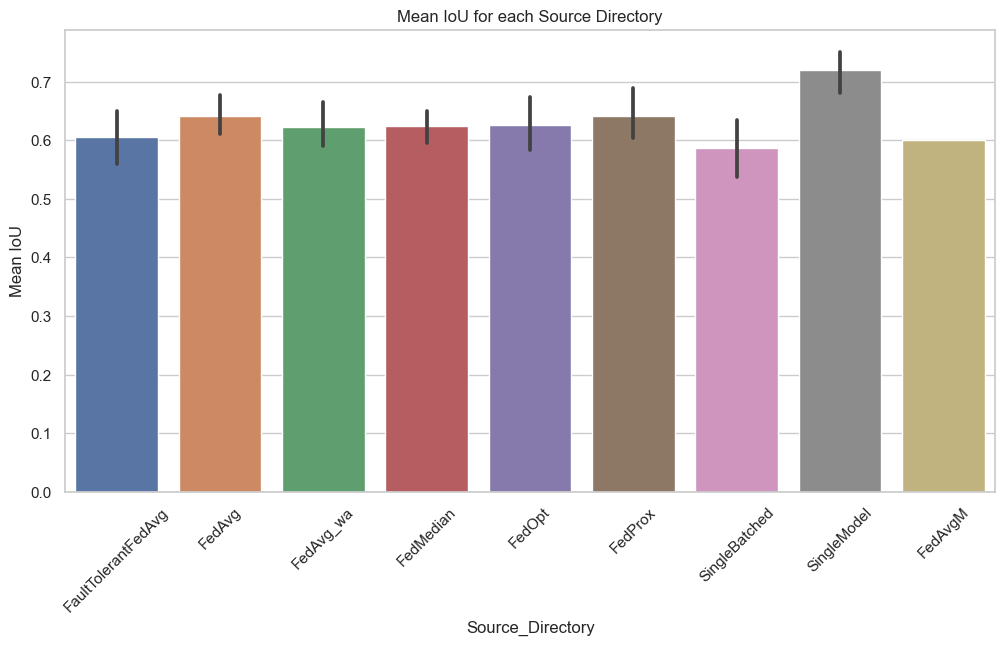

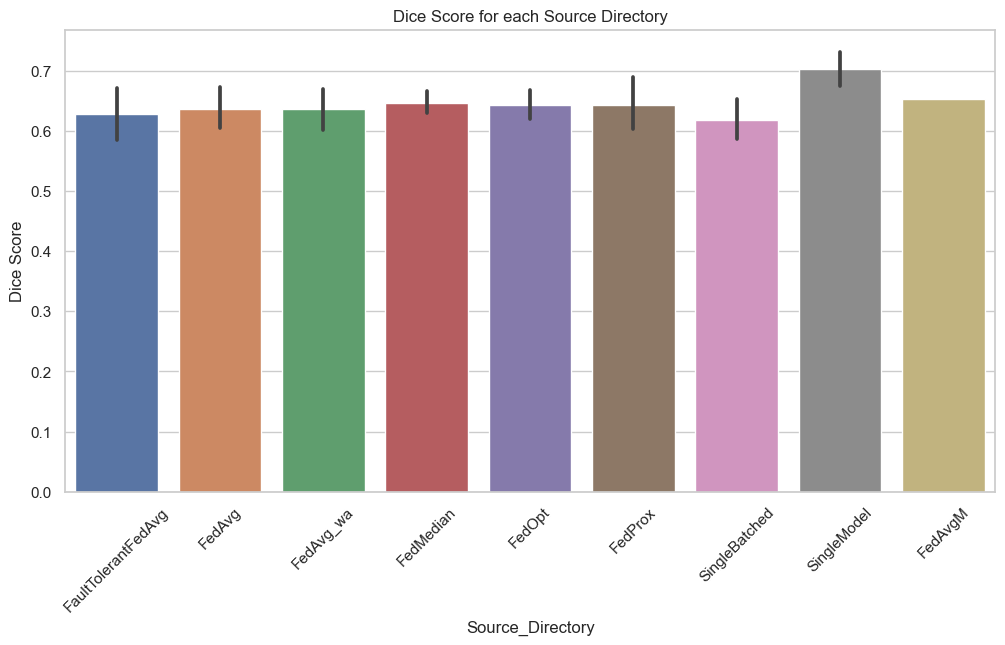

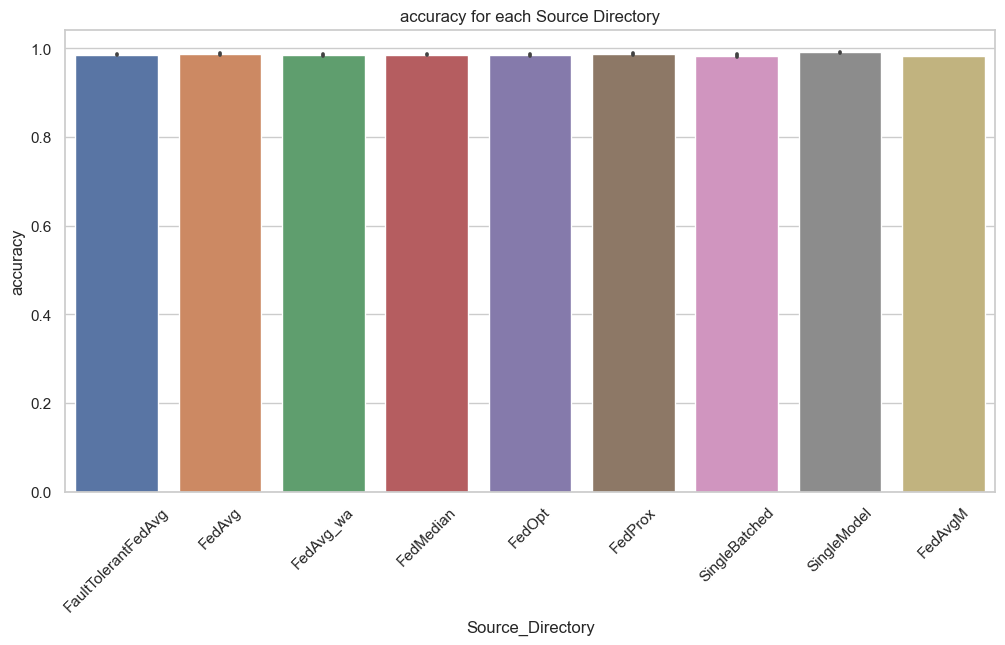

In [4]:
sns.set(style="whitegrid")

# Create bar plots for each accuracy metric
metrics = ['Mean IoU', 'Dice Score', 'accuracy']
for metric in metrics:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Source_Directory', y=metric, data=df)
    plt.title(f'{metric} for each Source Directory')
    plt.xticks(rotation=45)
    plt.show()

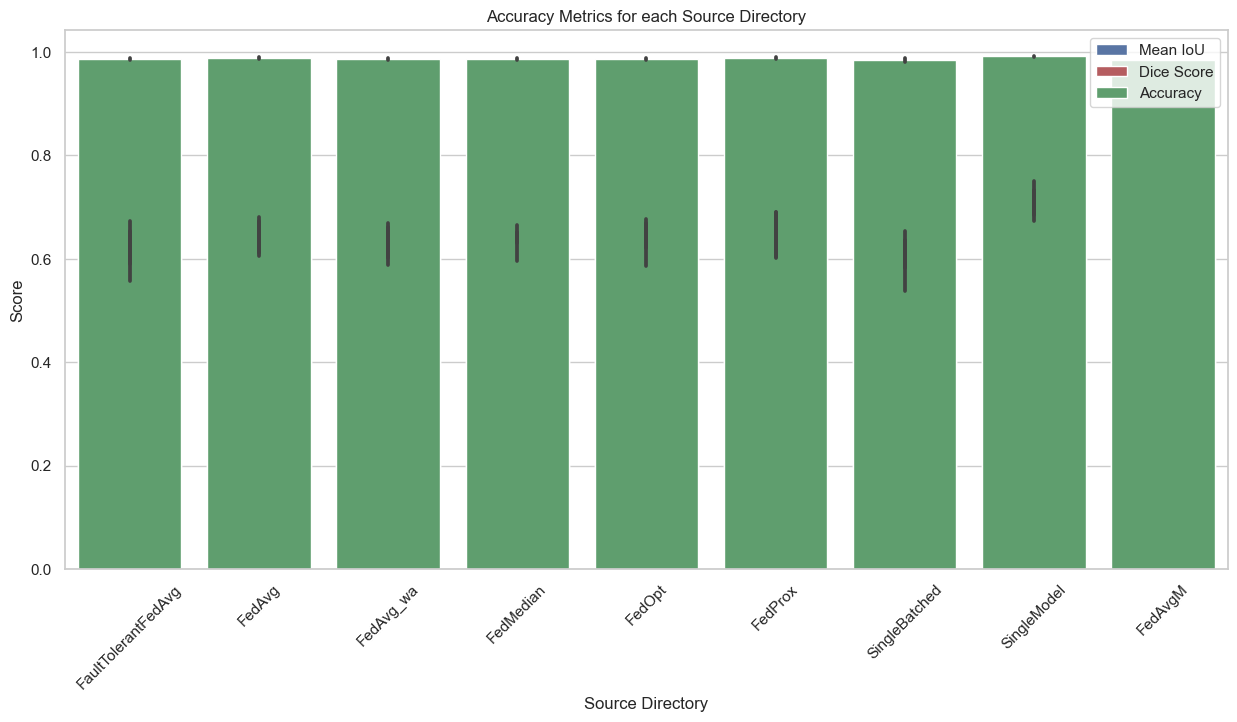

In [5]:
plt.figure(figsize=(15, 7))

# Create a grouped bar plot
sns.barplot(data=df, x='Source_Directory', y='Mean IoU', label='Mean IoU', color='b')
sns.barplot(data=df, x='Source_Directory', y='Dice Score', label='Dice Score', color='r')
sns.barplot(data=df, x='Source_Directory', y='accuracy', label='Accuracy', color='g')

# Set the labels and title
plt.xlabel('Source Directory')
plt.ylabel('Score')
plt.title('Accuracy Metrics for each Source Directory')

# Set the legend
plt.legend()

# Rotate x labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [6]:
sns.catplot(data=df, x='Source_Directory', y='Score', hue='Metric', kind='bar', aspect=2)

# Set the labels and title
plt.xlabel('Source Directory')
plt.ylabel('Score')
plt.title('Accuracy Metrics for each Source Directory')

# Rotate x labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

ValueError: Could not interpret input 'Score'

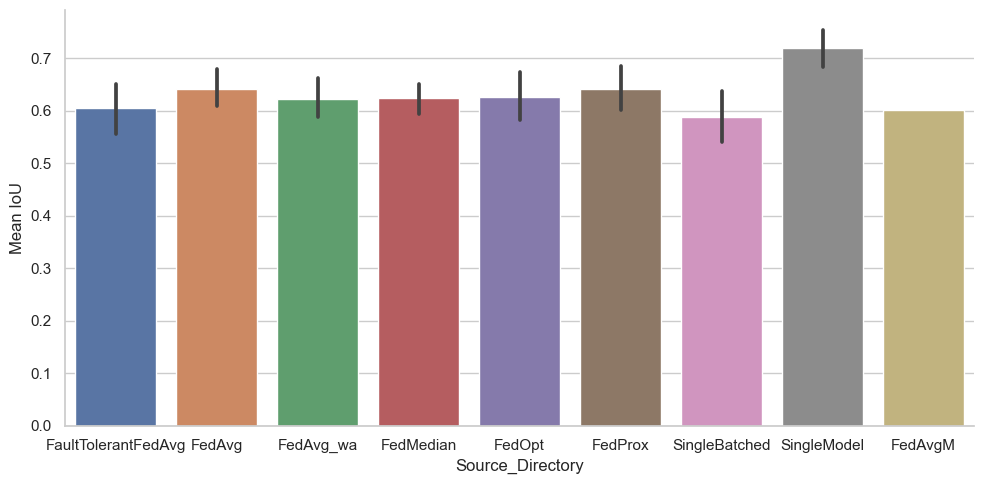

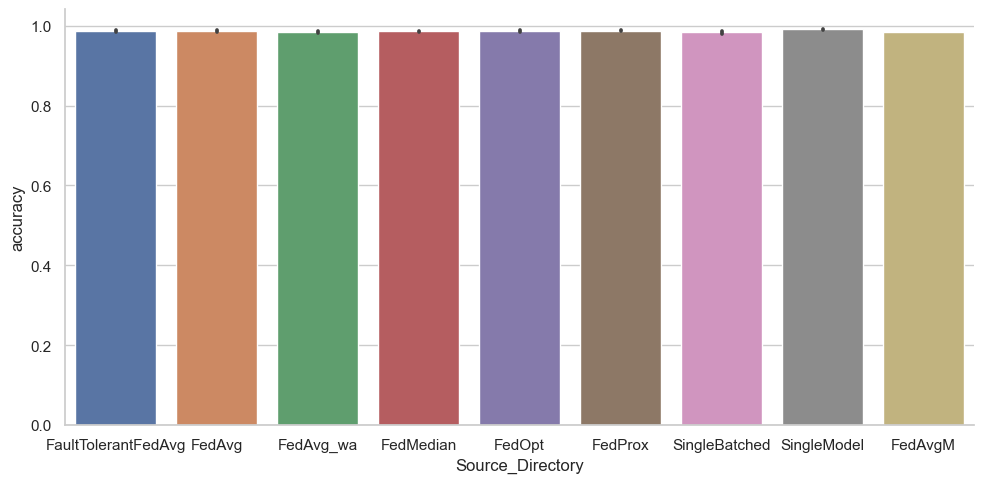

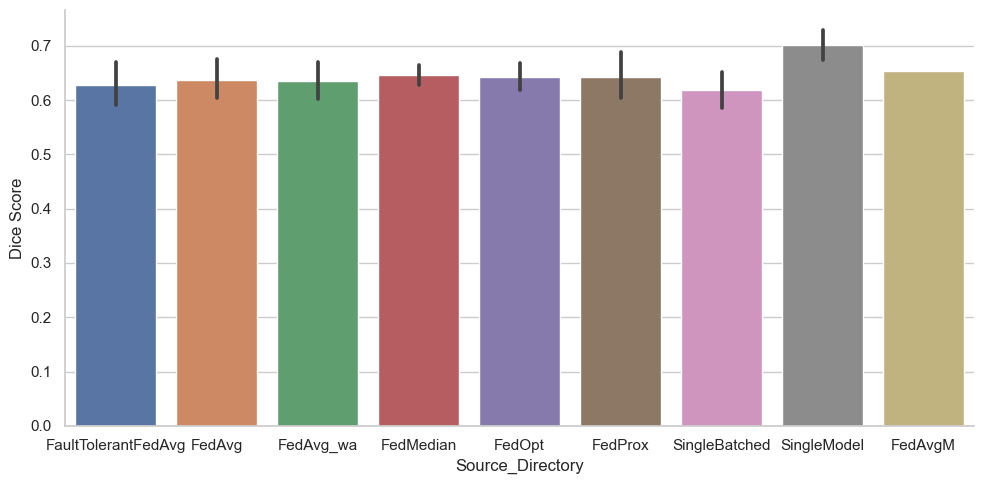

In [ ]:
sns.catplot(data=df, x='Source_Directory', y='Mean IoU',  kind='bar', aspect=2)
sns.catplot(data=df, x='Source_Directory', y='accuracy',  kind='bar', aspect=2)
sns.catplot(data=df, x='Source_Directory', y='Dice Score',  kind='bar', aspect=2)


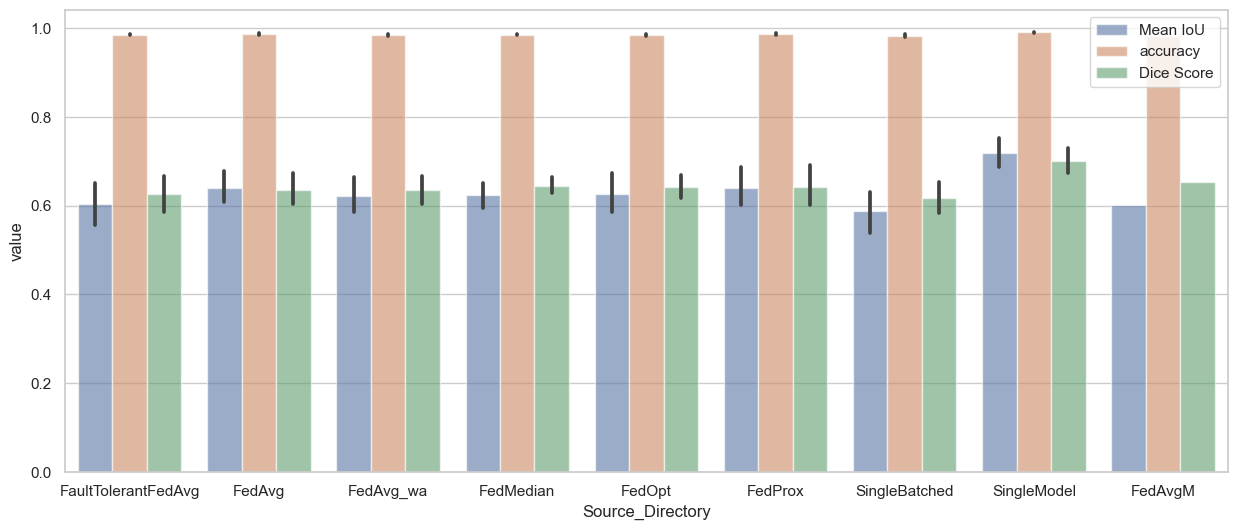

In [ ]:
# Melt the DataFrame to have a 'variable' column and a 'value' column
df_melted = pd.melt(df, id_vars=['Source_Directory'], value_vars=['Mean IoU', 'accuracy', 'Dice Score'])

# Set the figure size
plt.figure(figsize=(15,6))

# Create a bar plot with different colors for each variable
sns.barplot(data=df_melted, x='Source_Directory', y='value', hue='variable', alpha=0.6)

# Add legend to the plot
plt.legend()

# Show the plot
plt.show()

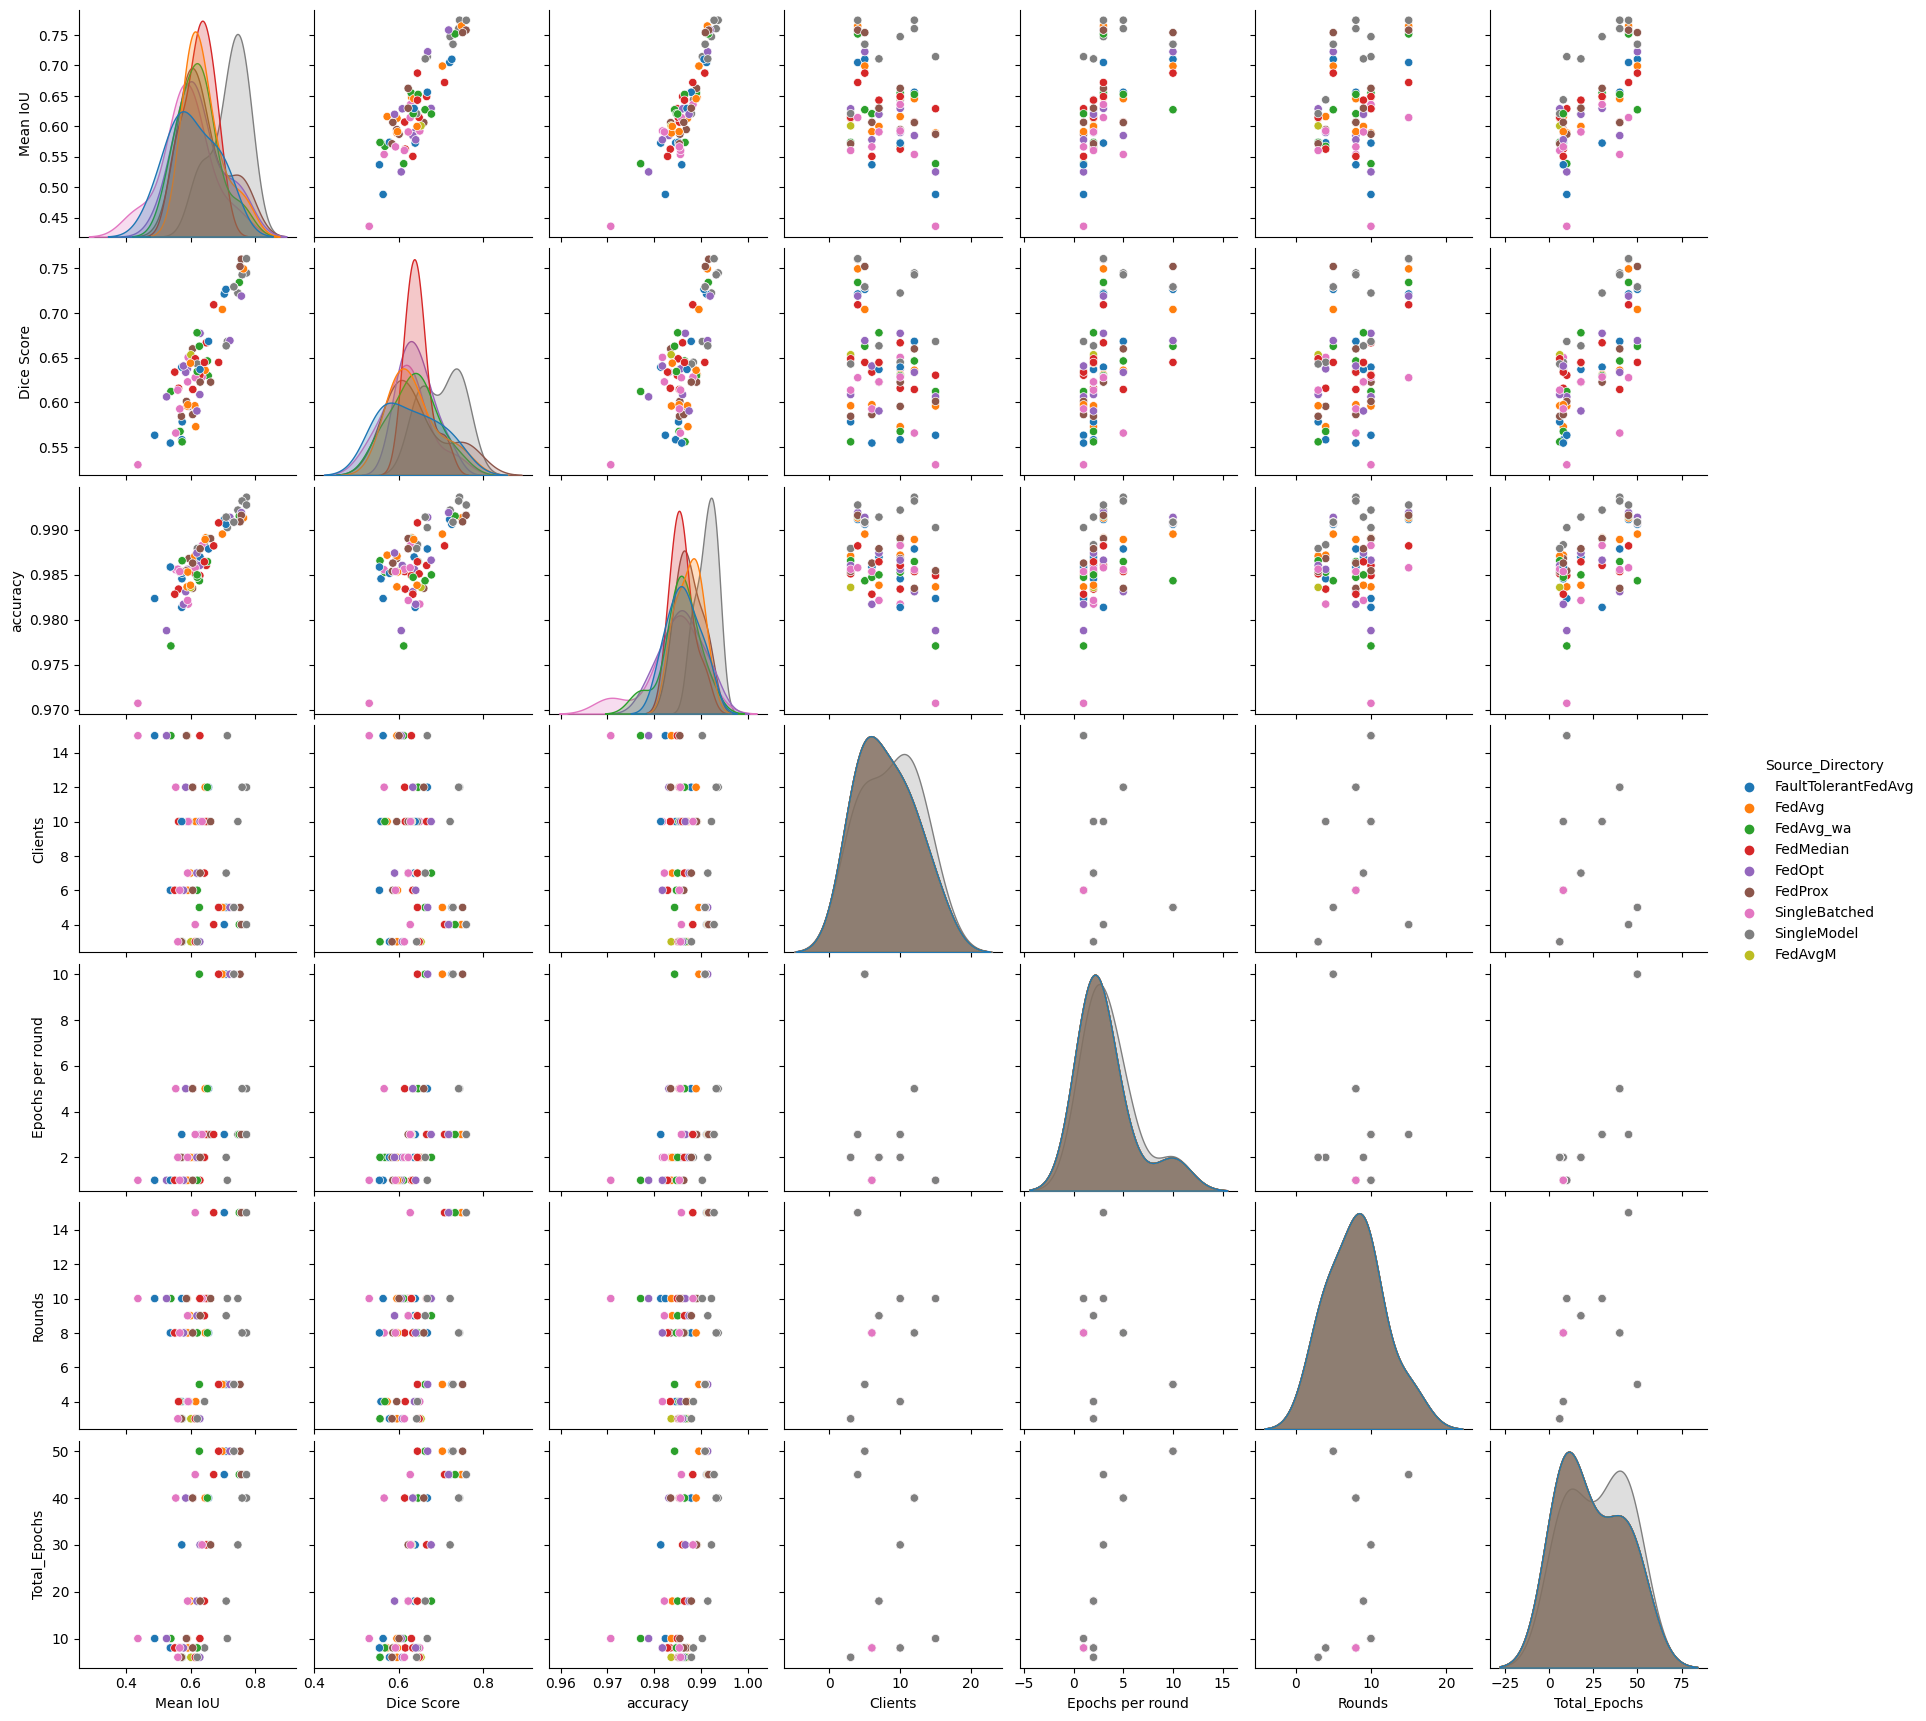

In [ ]:
sns.pairplot(df, hue='Source_Directory', diag_kind='kde')
plt.show()


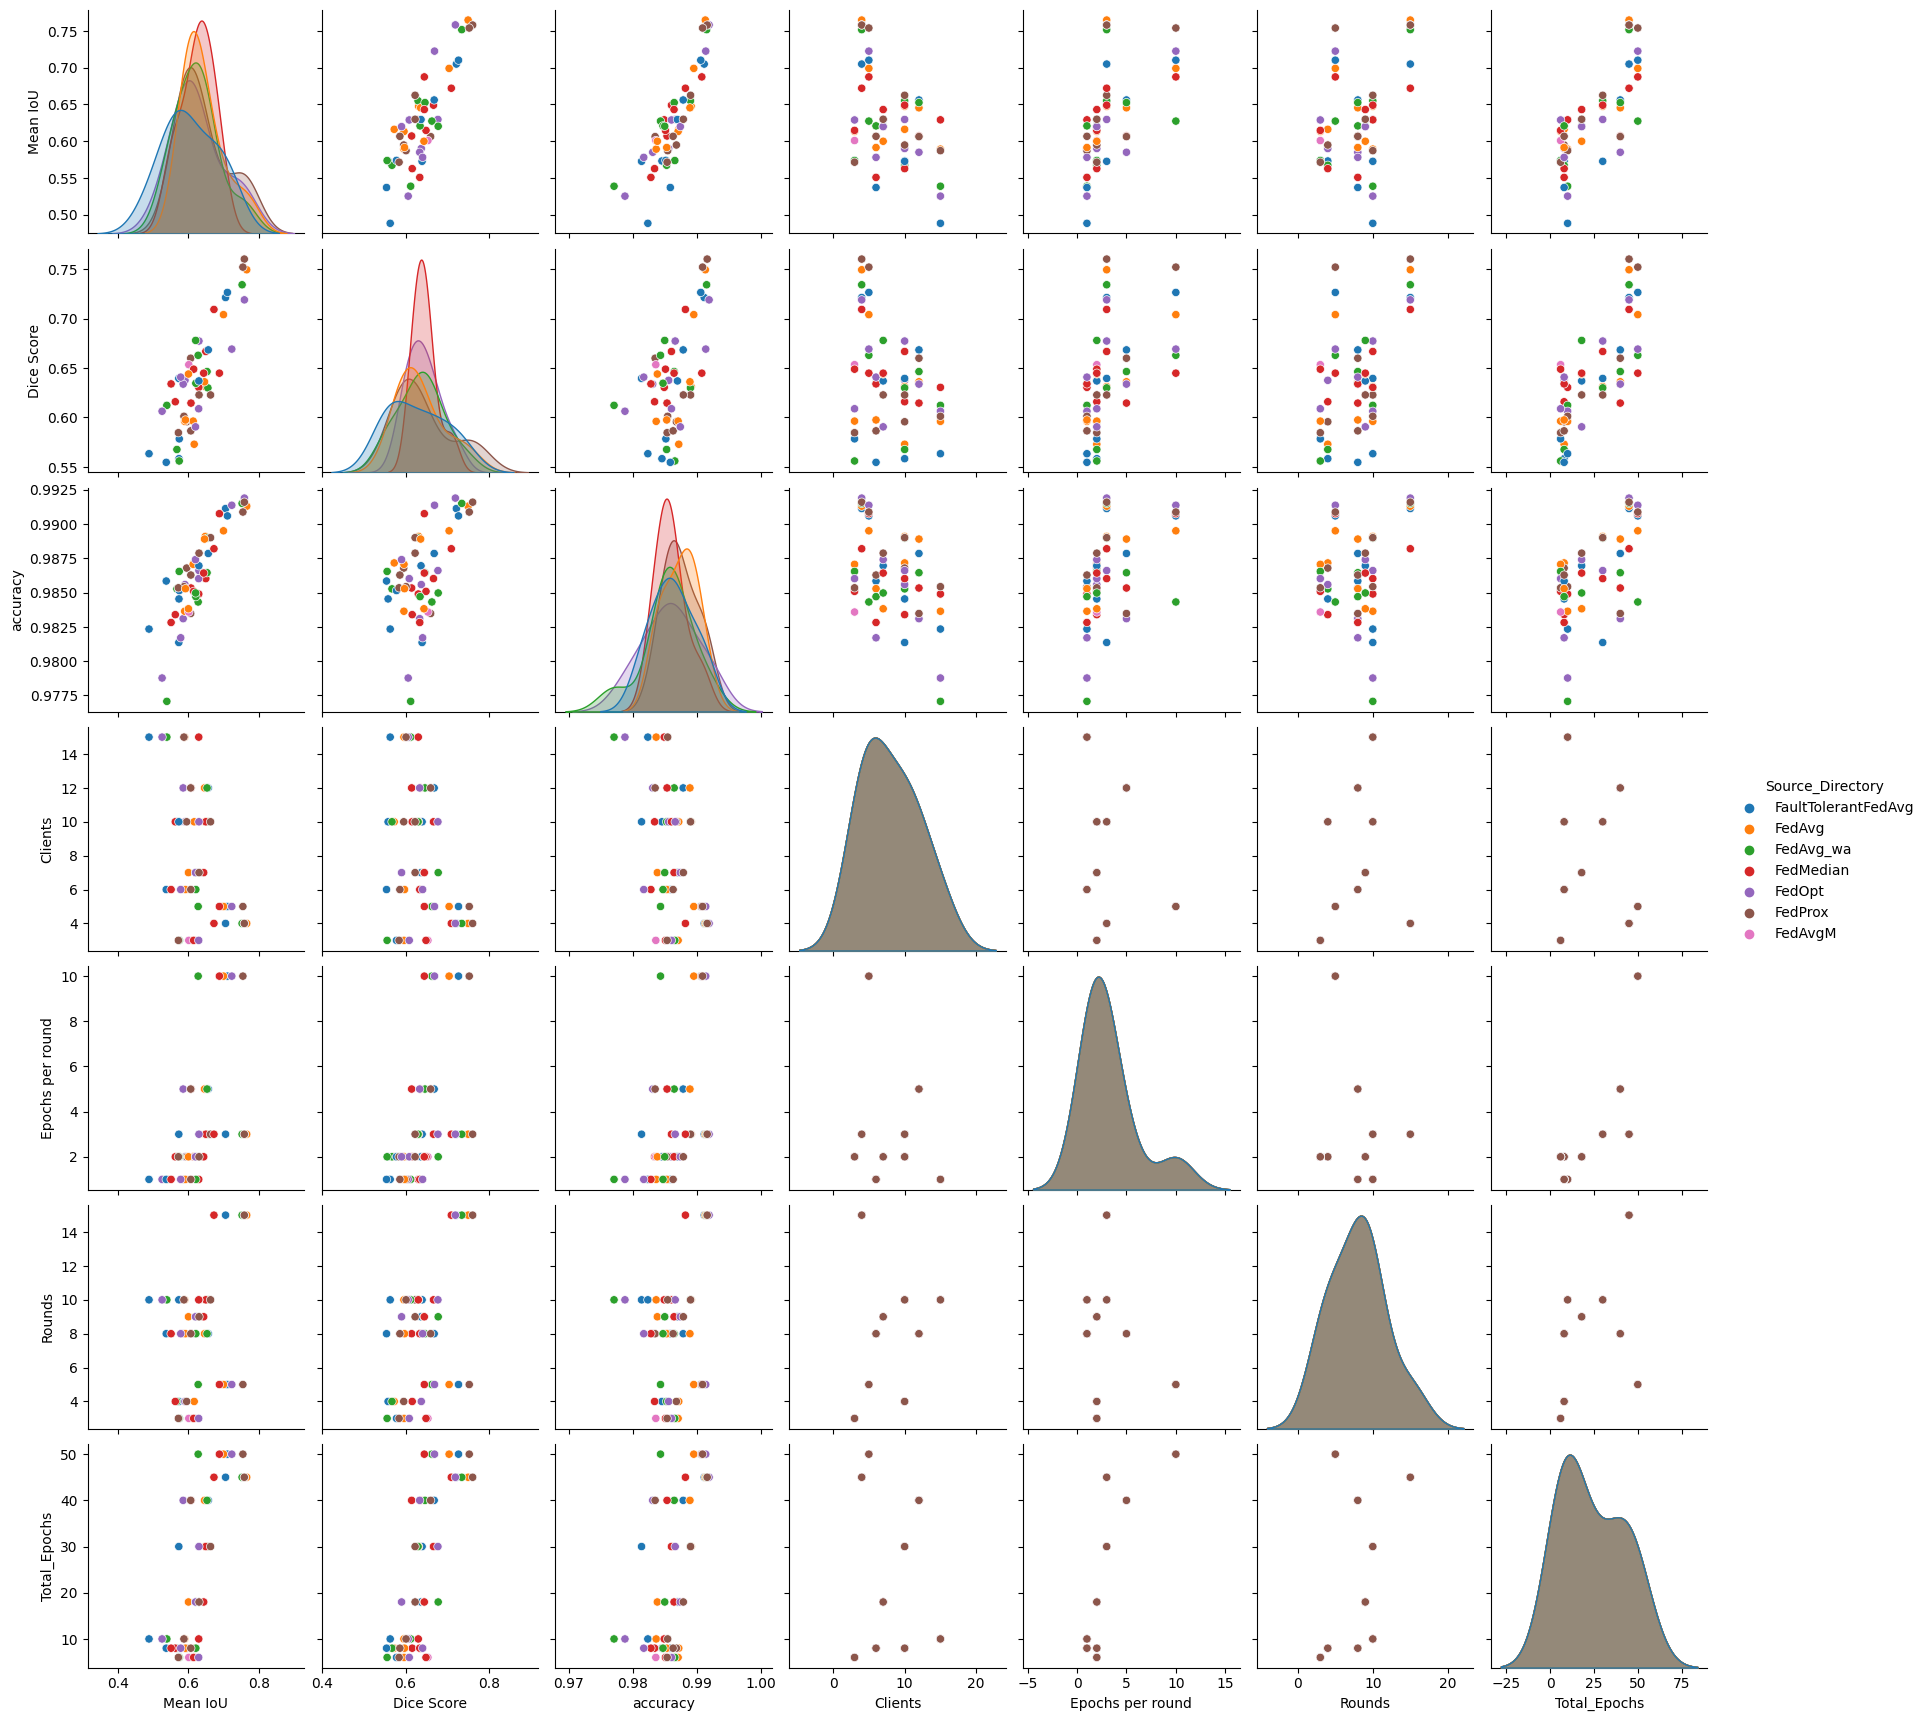

In [ ]:
fl = df[~df['Source_Directory'].isin(['SingleModel', 'SingleBatched'])]


# Create a pairplot with only fl trained models
sns.pairplot(fl, hue='Source_Directory', diag_kind='kde')
plt.show()



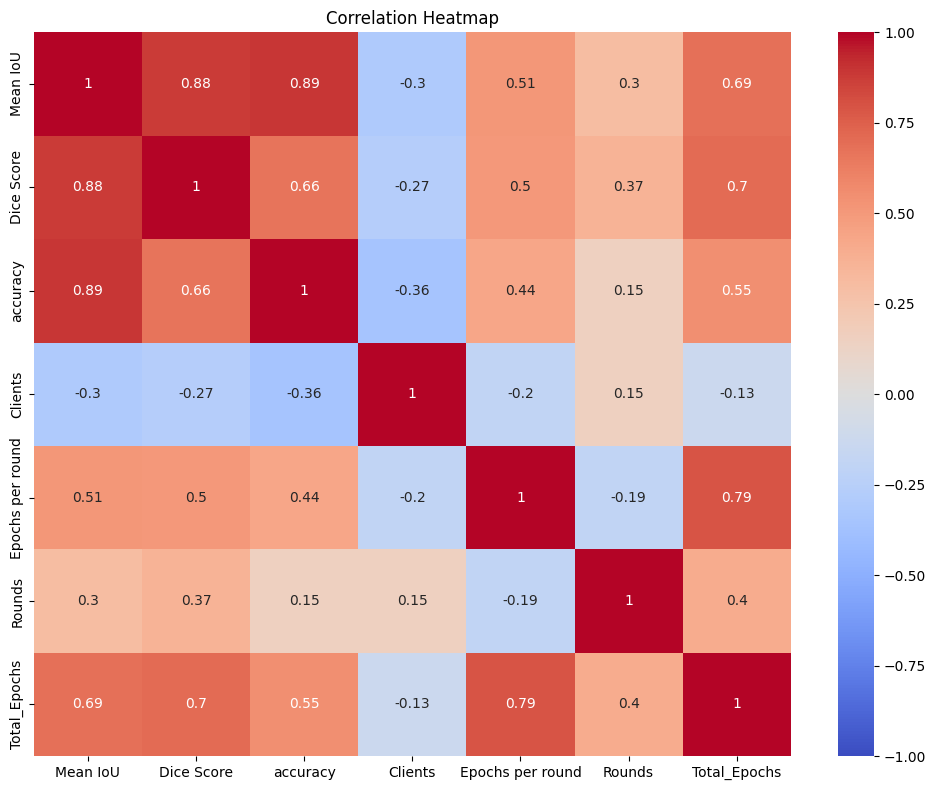

In [ ]:
corr = df[['Mean IoU', 'Dice Score', 'accuracy', 'Clients', 'Epochs per round', 'Rounds', 'Total_Epochs']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


C:\Users\jackb\AppData\Local\Temp\ipykernel_16452\501692696.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="Clients", y="Dice Score", hue="Source_Directory", data=df, ci=None)


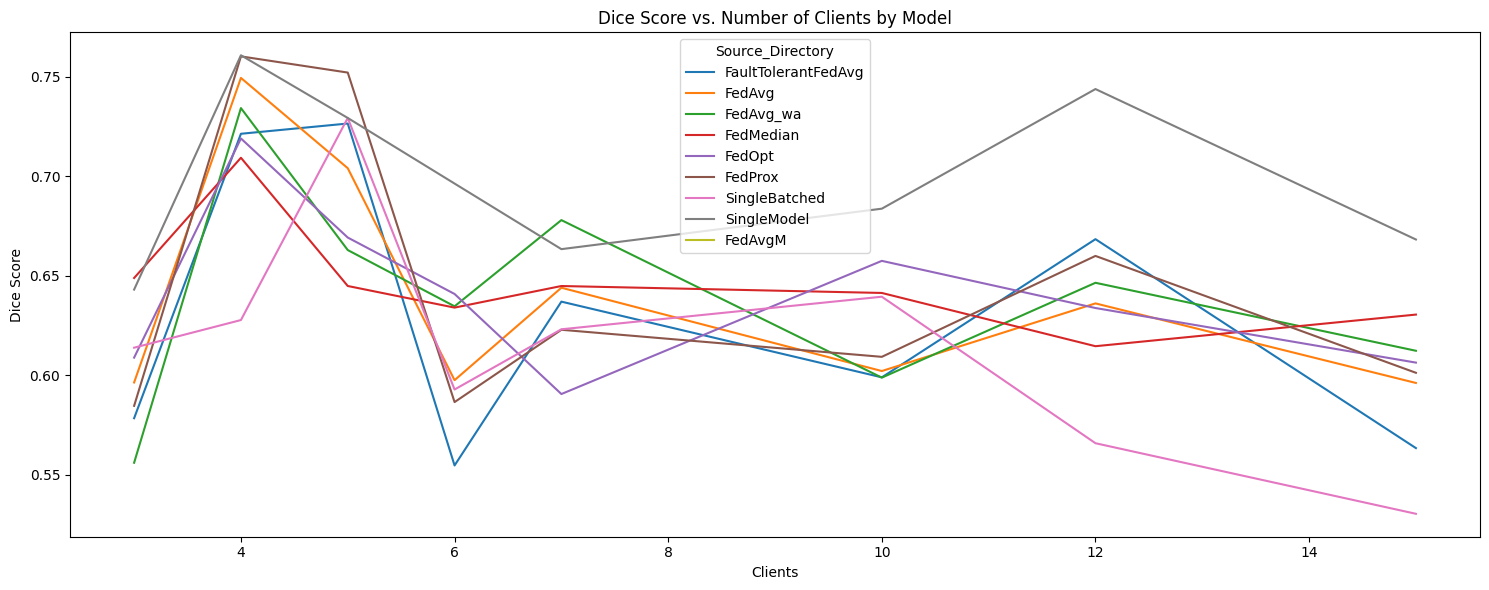

C:\Users\jackb\AppData\Local\Temp\ipykernel_16452\501692696.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="Rounds", y="Dice Score", hue="Source_Directory", data=df, ci=None)


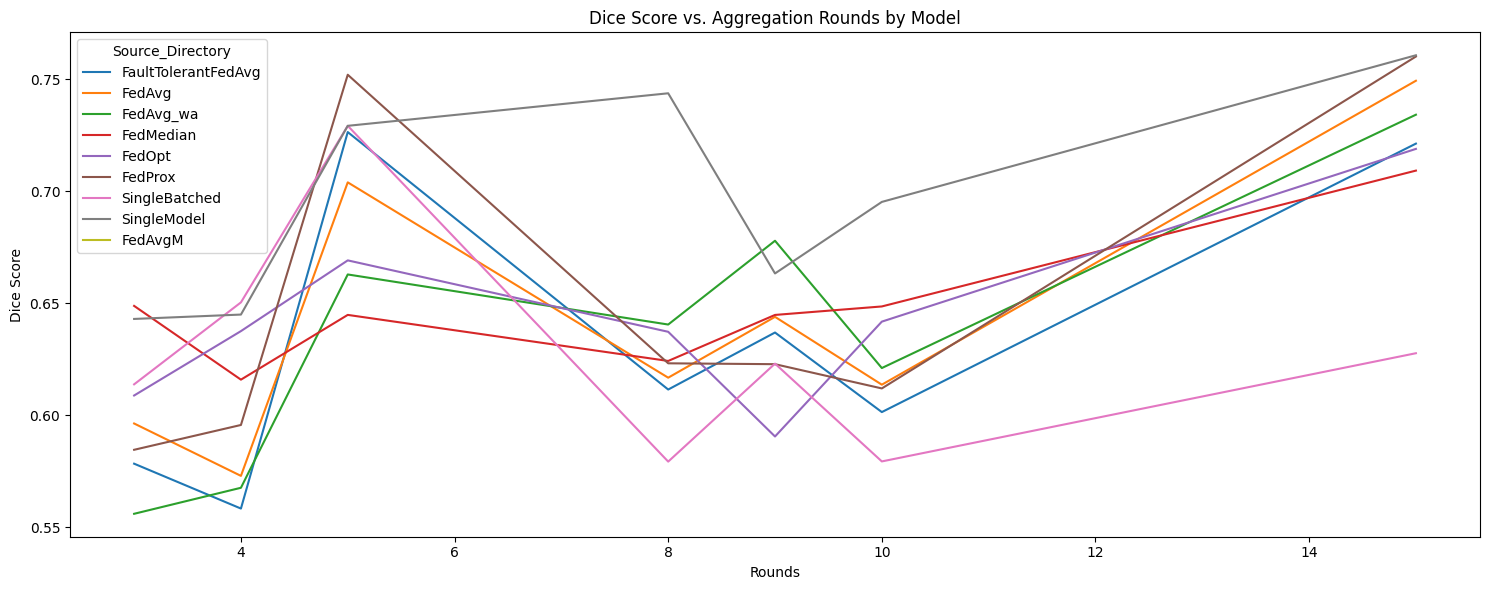

C:\Users\jackb\AppData\Local\Temp\ipykernel_16452\501692696.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="Total_Epochs", y="Dice Score", hue="Source_Directory", data=df, ci=None)


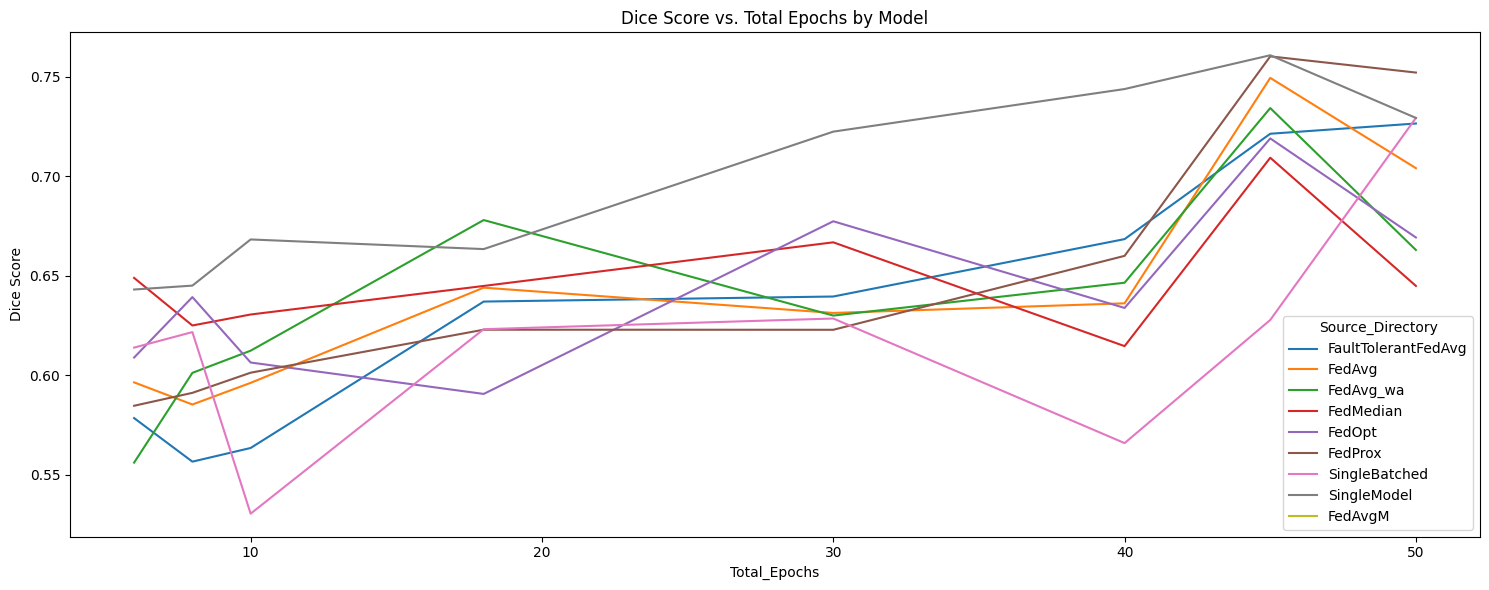

In [ ]:
plt.figure(figsize=(15, 6))
sns.lineplot(x="Clients", y="Dice Score", hue="Source_Directory", data=df, ci=None)
plt.title('Dice Score vs. Number of Clients by Model')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))
sns.lineplot(x="Rounds", y="Dice Score", hue="Source_Directory", data=df, ci=None)
plt.title('Dice Score vs. Aggregation Rounds by Model')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))
sns.lineplot(x="Total_Epochs", y="Dice Score", hue="Source_Directory", data=df, ci=None)
plt.title('Dice Score vs. Total Epochs by Model')
plt.tight_layout()
plt.show()


C:\Users\jackb\AppData\Local\Temp\ipykernel_16452\777939792.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="Clients", y="accuracy", hue="Source_Directory", data=df, ci=None)


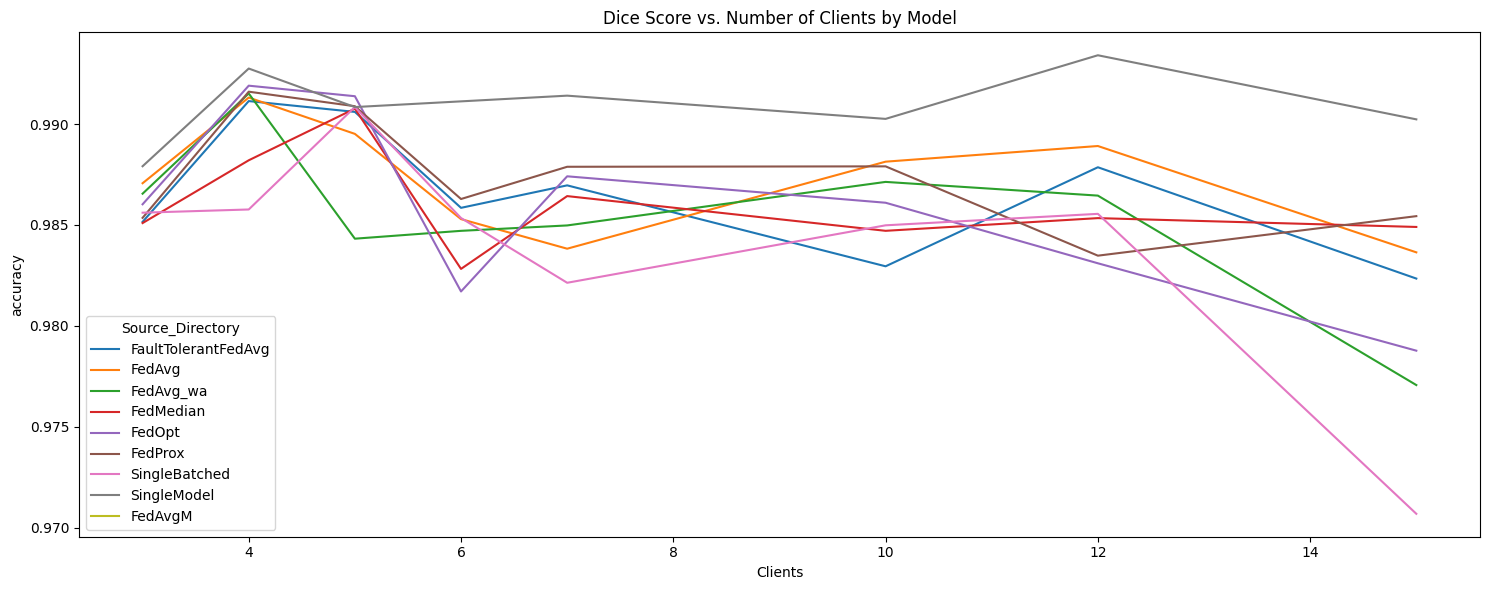

C:\Users\jackb\AppData\Local\Temp\ipykernel_16452\777939792.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="Rounds", y="accuracy", hue="Source_Directory", data=df, ci=None)


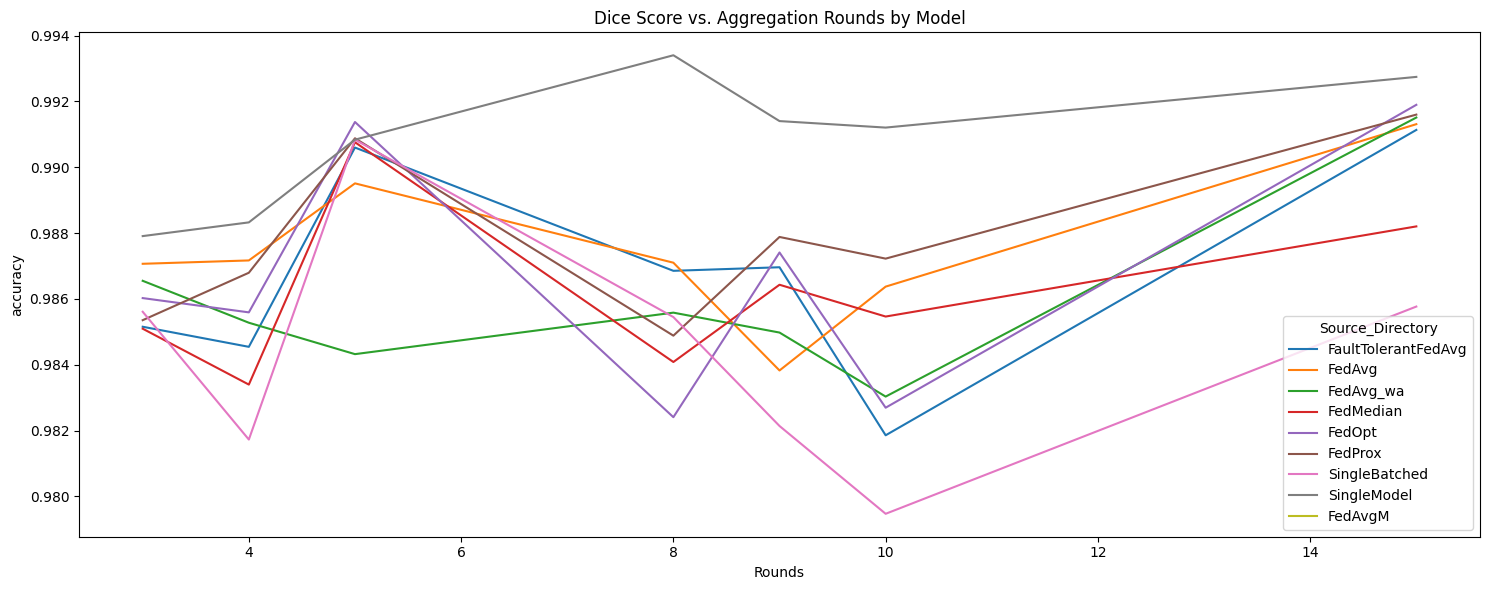

C:\Users\jackb\AppData\Local\Temp\ipykernel_16452\777939792.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="Total_Epochs", y="accuracy", hue="Source_Directory", data=df, ci=None)


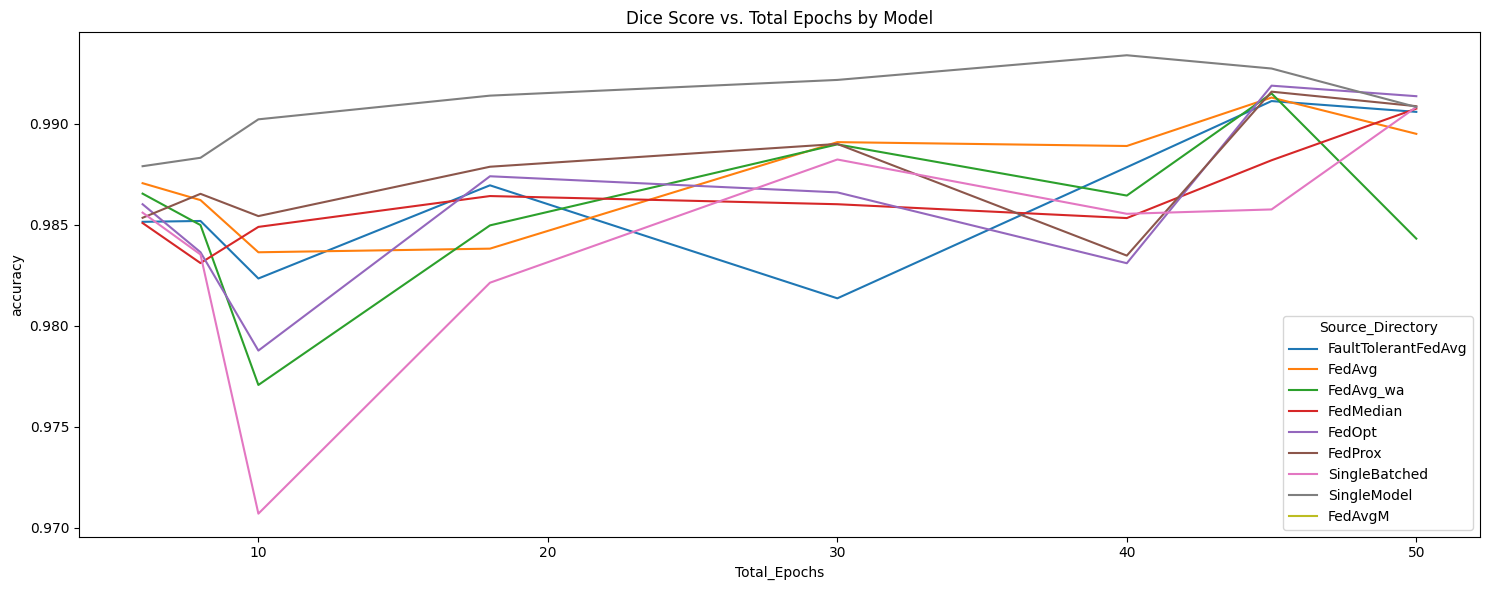

In [ ]:
plt.figure(figsize=(15, 6))
sns.lineplot(x="Clients", y="accuracy", hue="Source_Directory", data=df, ci=None)
plt.title('Dice Score vs. Number of Clients by Model')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))
sns.lineplot(x="Rounds", y="accuracy", hue="Source_Directory", data=df, ci=None)
plt.title('Dice Score vs. Aggregation Rounds by Model')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))
sns.lineplot(x="Total_Epochs", y="accuracy", hue="Source_Directory", data=df, ci=None)
plt.title('Dice Score vs. Total Epochs by Model')
plt.tight_layout()
plt.show()


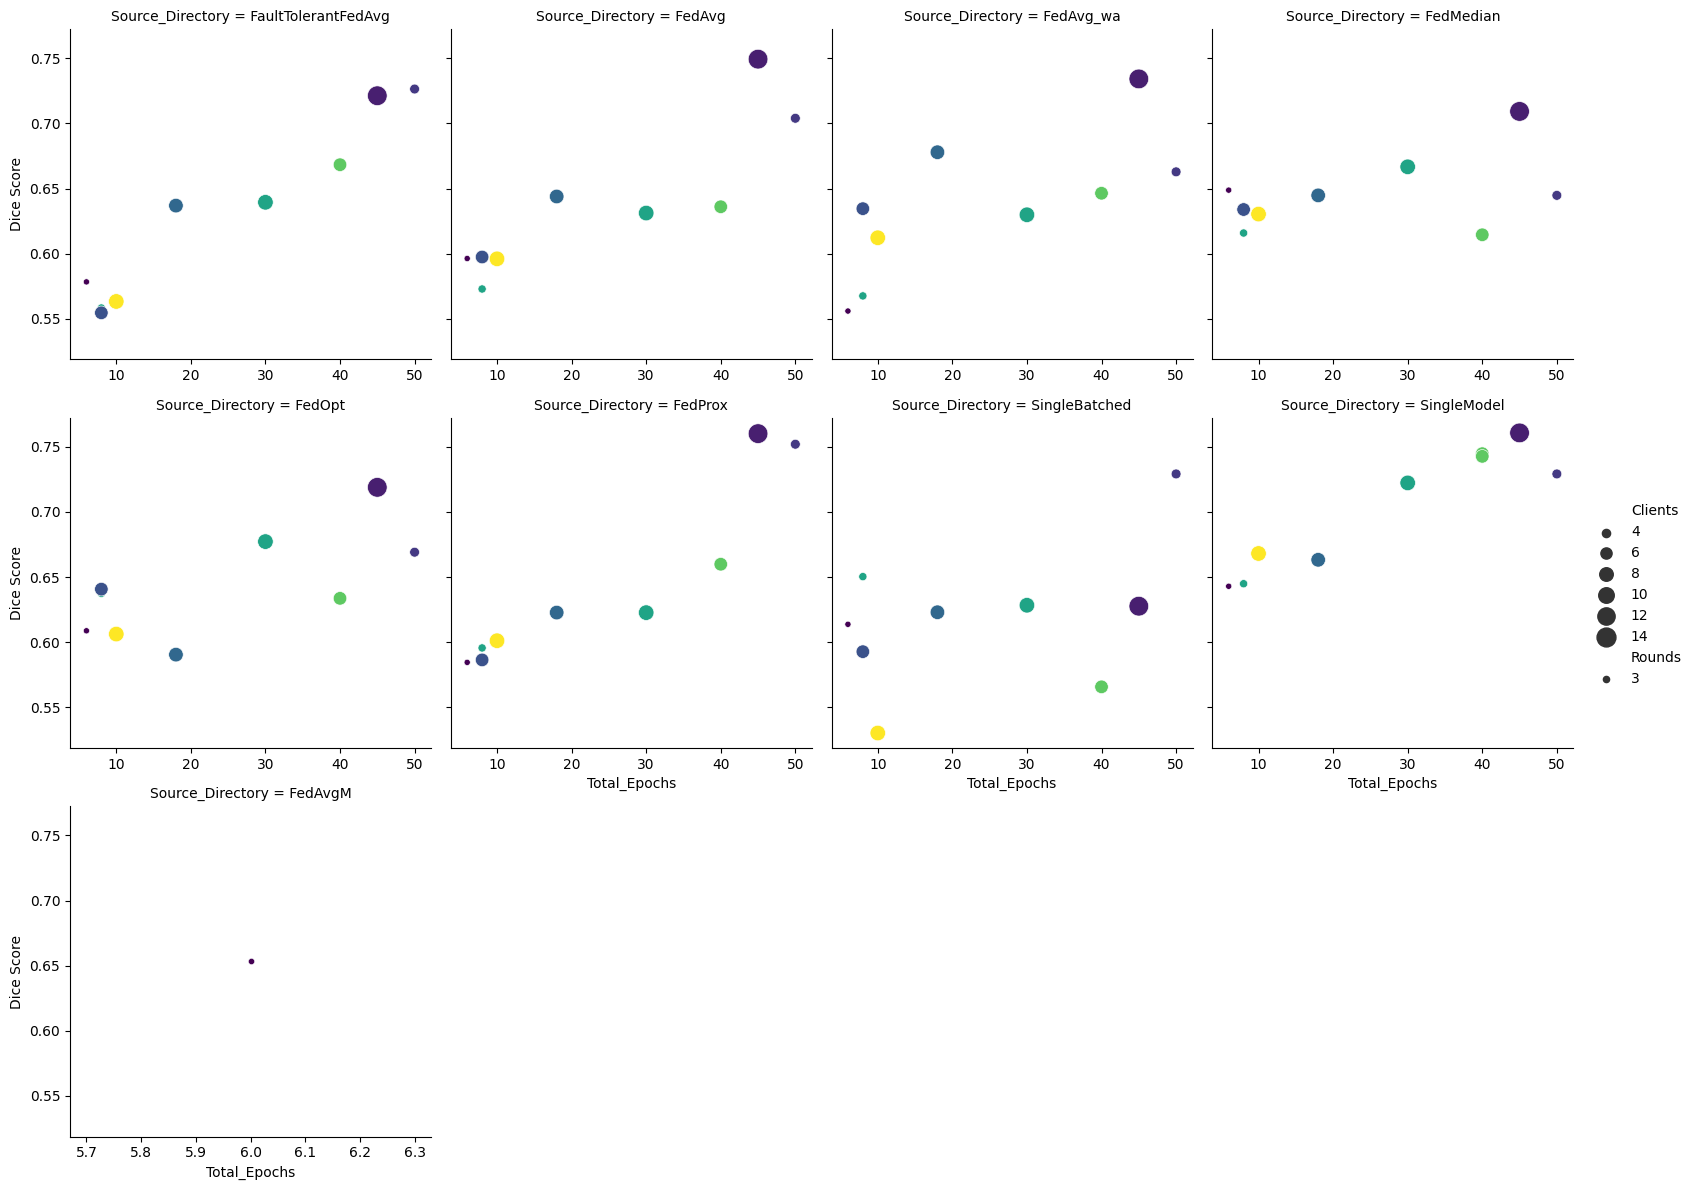

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a facet grid
g = sns.FacetGrid(df, col="Source_Directory", col_wrap=4, height=4, sharex=False)

# Scatter plot: Total Epochs vs Dice Score, color-coded by Number of Clients
g.map_dataframe(sns.scatterplot, x="Total_Epochs", y="Dice Score", hue="Clients", palette="viridis", size="Rounds", sizes=(20, 200))

# Add legend
g.add_legend()

# Show the plot
plt.show()


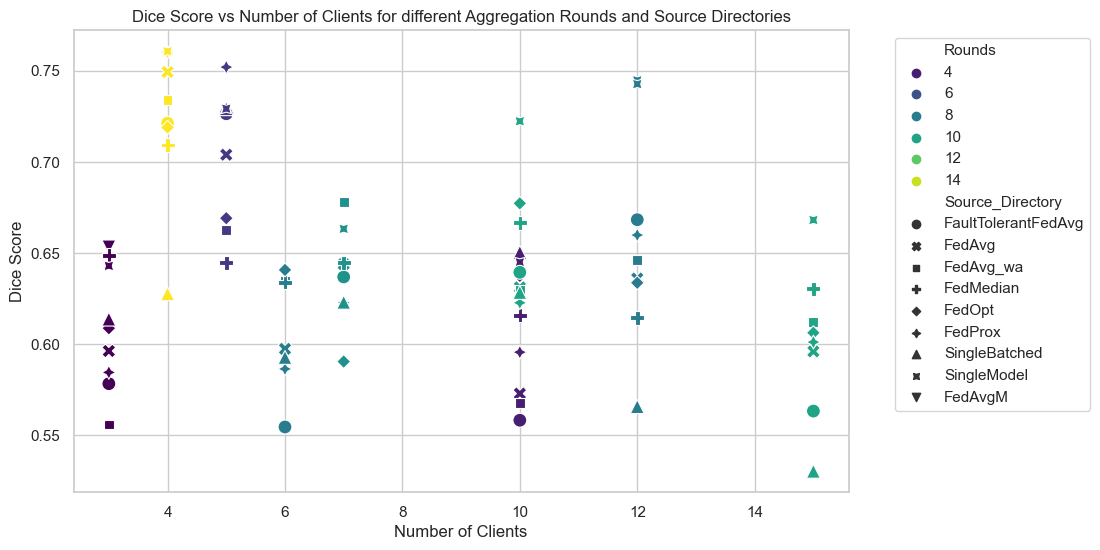

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Clients', y='Dice Score', hue='Rounds', style='Source_Directory', palette='viridis', s=100)

plt.title('Dice Score vs Number of Clients for different Aggregation Rounds and Source Directories')
plt.xlabel('Number of Clients')
plt.ylabel('Dice Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\jackb\AppData\Local\Temp\ipykernel_16452\2863560075.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fl['Dice Score'] = fl['Dice Score'].astype(float)


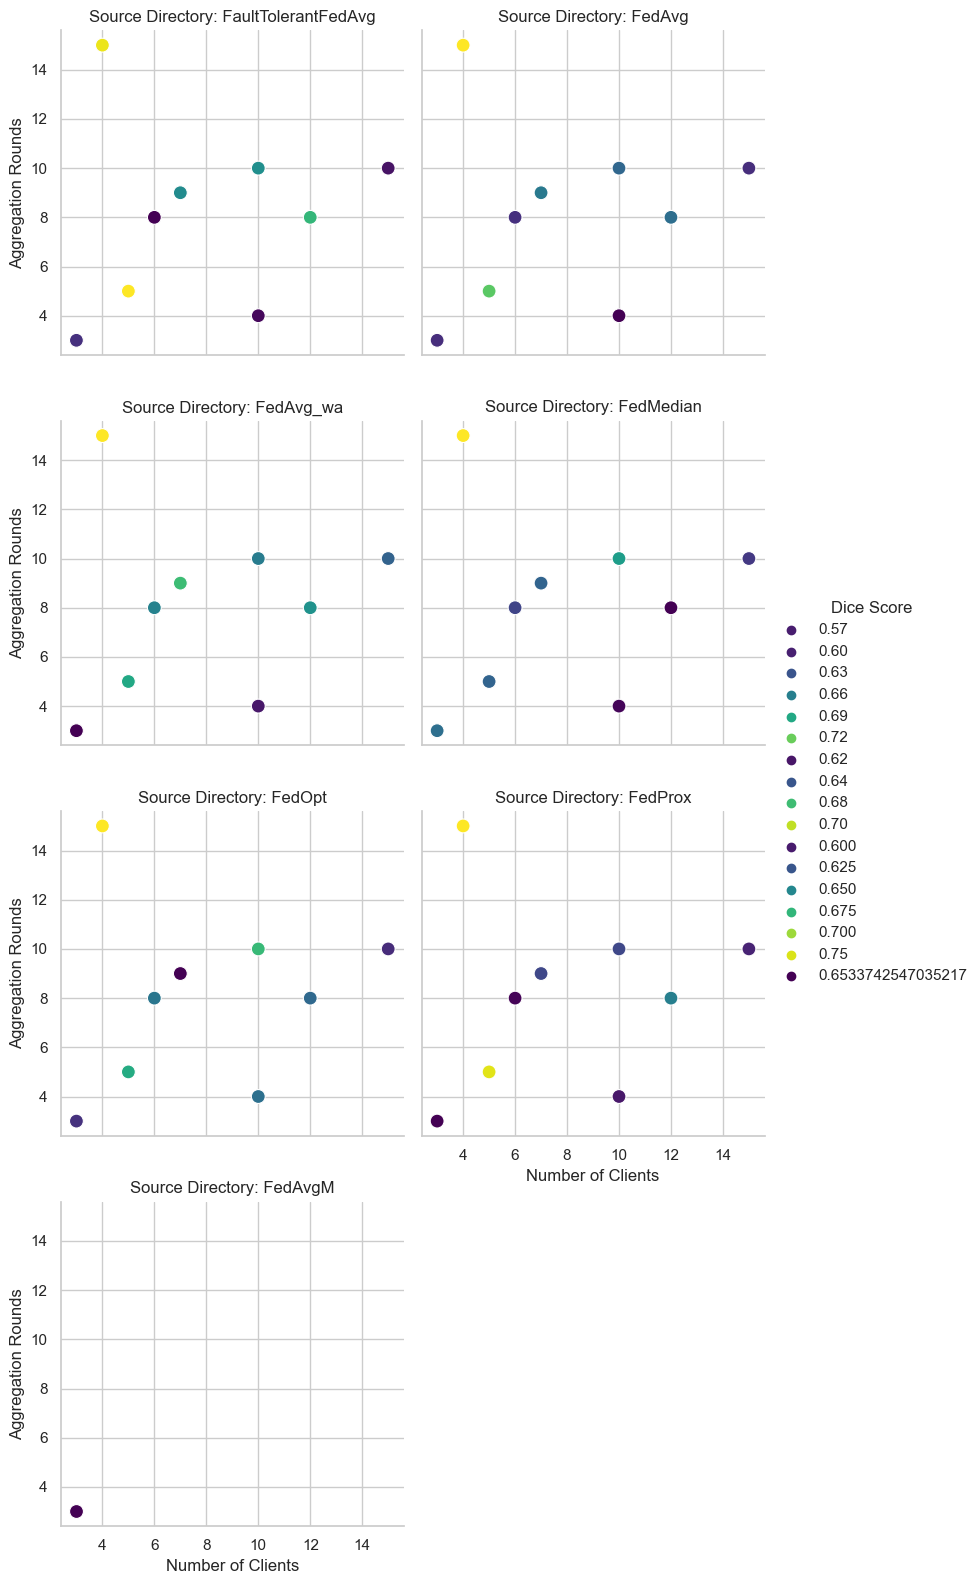

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load your DataFrame fl here

# Ensure Dice Score is a numeric column
fl['Dice Score'] = fl['Dice Score'].astype(float)

# Create a FacetGrid
g = sns.FacetGrid(fl, col="Source_Directory", col_wrap=2, height=4, sharey=True)

# Map a scatter plot onto the FacetGrid
g.map_dataframe(sns.scatterplot, x='Clients', y='Rounds', hue='Dice Score', palette='viridis', s=100)

# Add titles and labels
g.set_axis_labels('Number of Clients', 'Aggregation Rounds')
g.set_titles('Source Directory: {col_name}')
g.add_legend(title='Dice Score')

plt.show()


C:\Users\jackb\AppData\Local\Temp\ipykernel_16452\1621161425.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fl['Dice Score'] = fl['Dice Score'].astype(float)
c:\ProgramData\anaconda3\lib\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
c:\ProgramData\anaconda3\lib\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
c:\ProgramData\anaconda3\lib\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = 

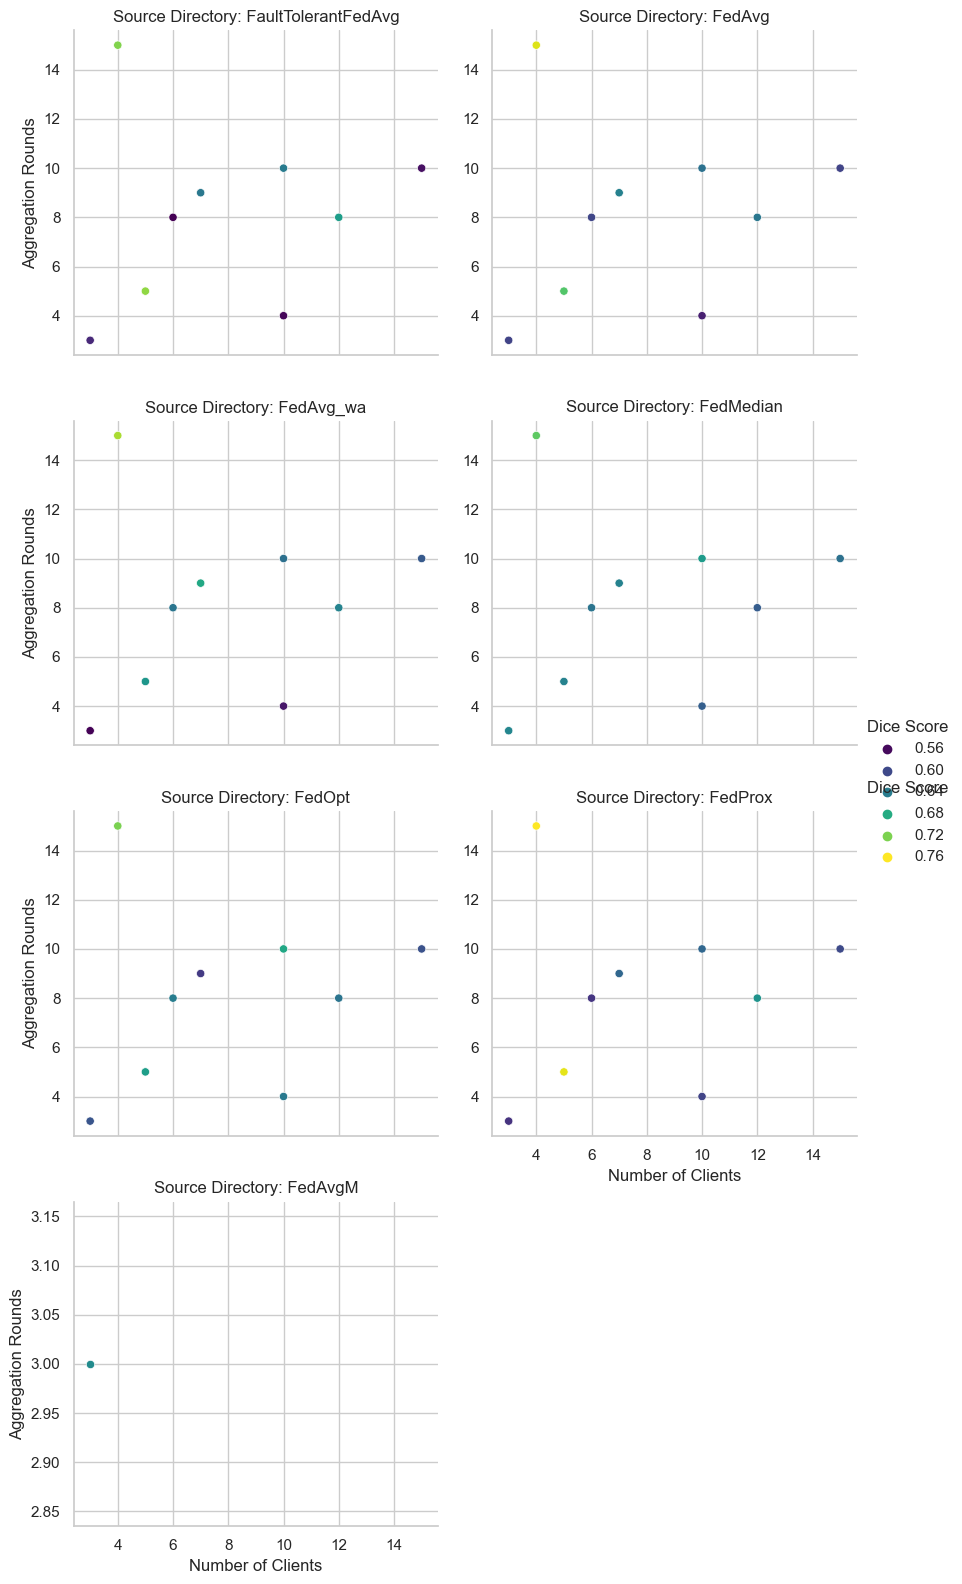

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load your DataFrame fl here

# Ensure Dice Score is a numeric column
fl['Dice Score'] = fl['Dice Score'].astype(float)

# Create a relplot with scatterplot kind
g = sns.relplot(
    data=fl,
    x='Clients',
    y='Rounds',
    hue='Dice Score',
    palette='viridis',
    col="Source_Directory",
    col_wrap=2,
    kind='scatter',
    height=4,
    aspect=1,  # Adjust aspect ratio as needed
    facet_kws=dict(sharey=False),
    vmin=0.5,  # Set minimum value of the color scale
    vmax=0.85,  # Set maximum value of the color scale
)

# Add titles and labels
g.set_axis_labels('Number of Clients', 'Aggregation Rounds')
g.set_titles('Source Directory: {col_name}')
g.add_legend(title='Dice Score')

plt.show()


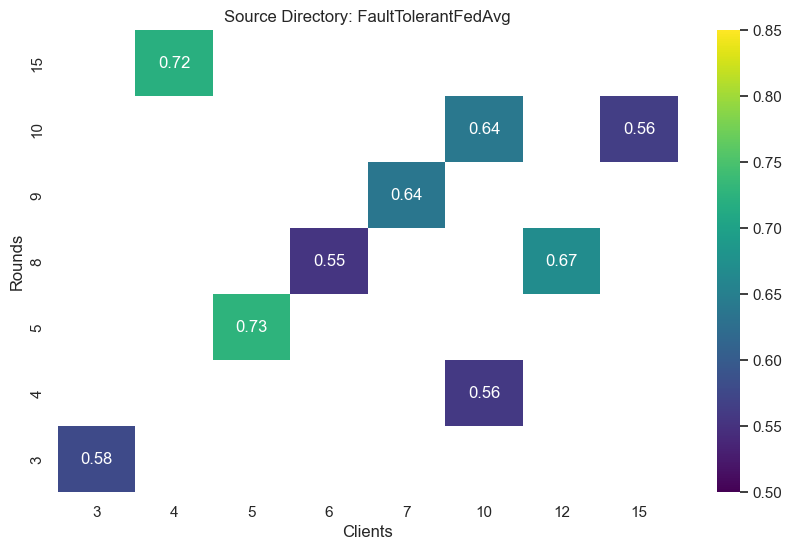

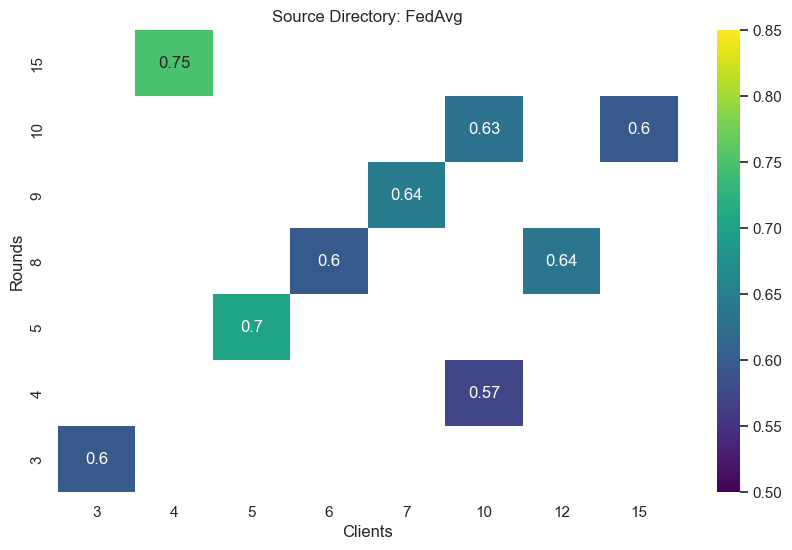

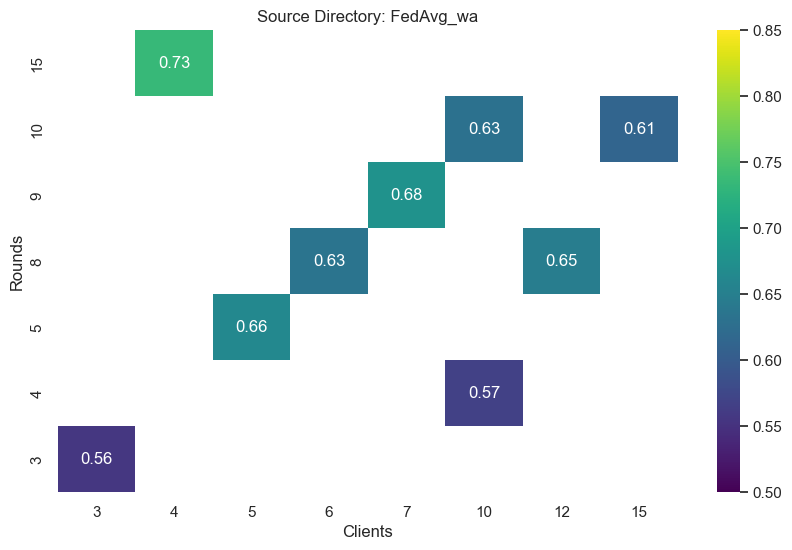

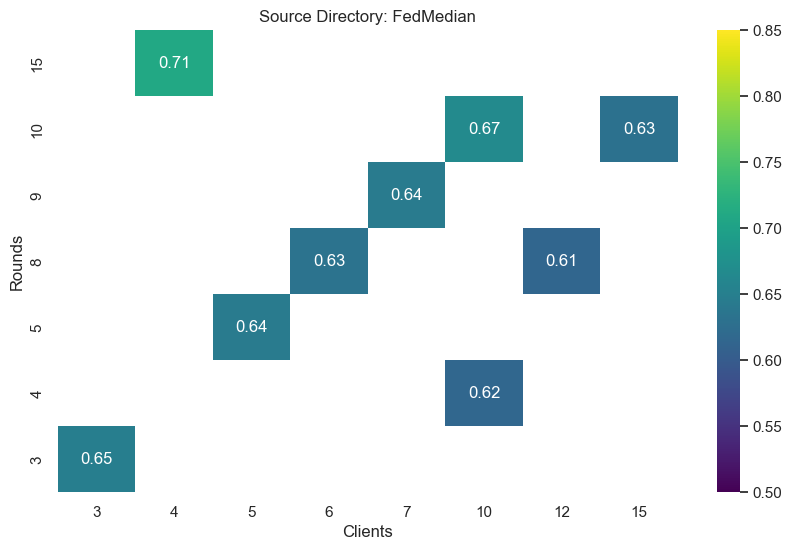

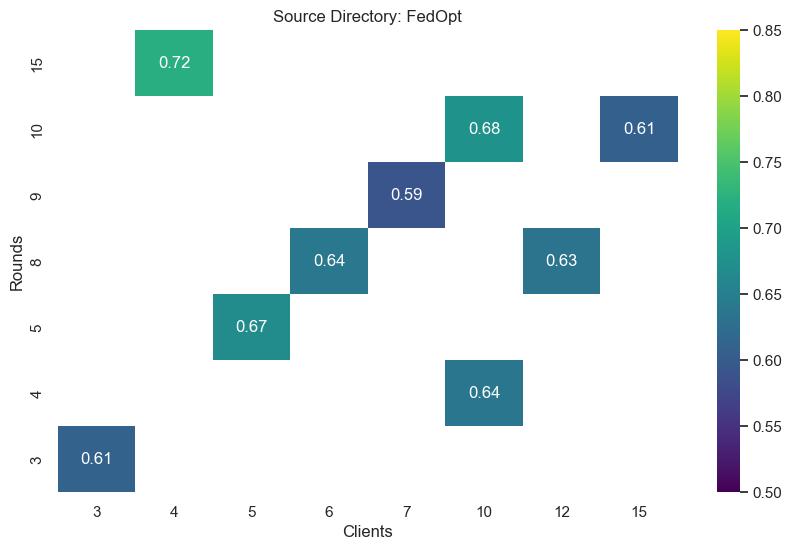

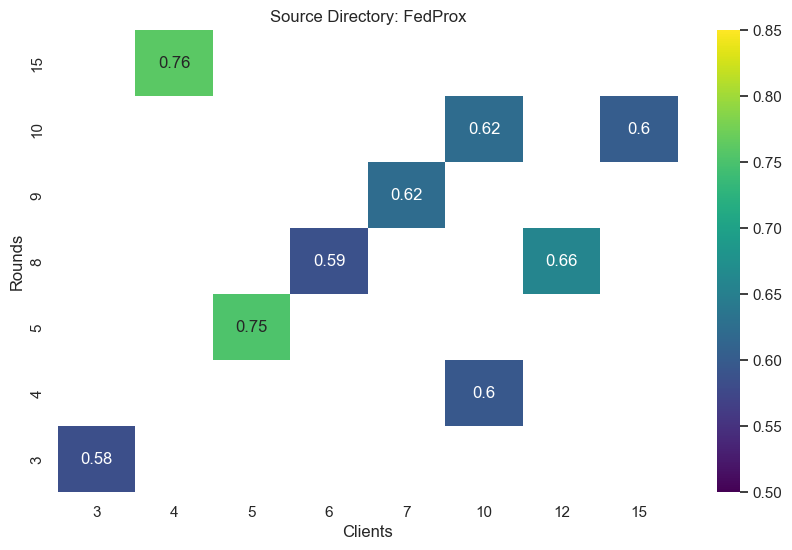

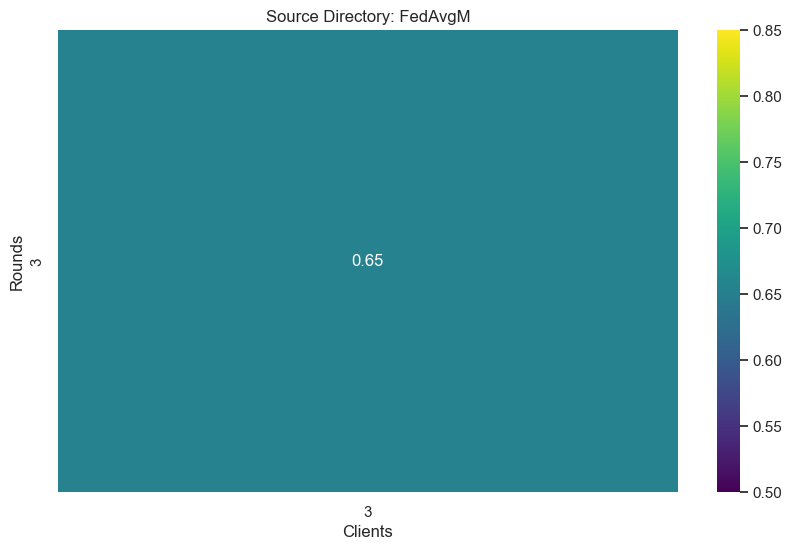

In [ ]:
# Get unique source directories
source_directories = fl['Source_Directory'].unique()

# Loop through each unique source directory
for directory in source_directories:
    # Subset the DataFrame for the current directory
    subset_df = fl[fl['Source_Directory'] == directory]
    
    # Create a pivot table for the heatmap
    pivot_table = subset_df.pivot(index='Rounds', columns='Clients', values='Dice Score')
    pivot_table = pivot_table.sort_index(ascending=False)
    
    # Create a heatmap for the current directory
    plt.figure(figsize=(10,6))
    sns.heatmap(pivot_table, annot=True, cmap='viridis', vmin=0.5, vmax=0.85)
    plt.title(f'Source Directory: {directory}')
    plt


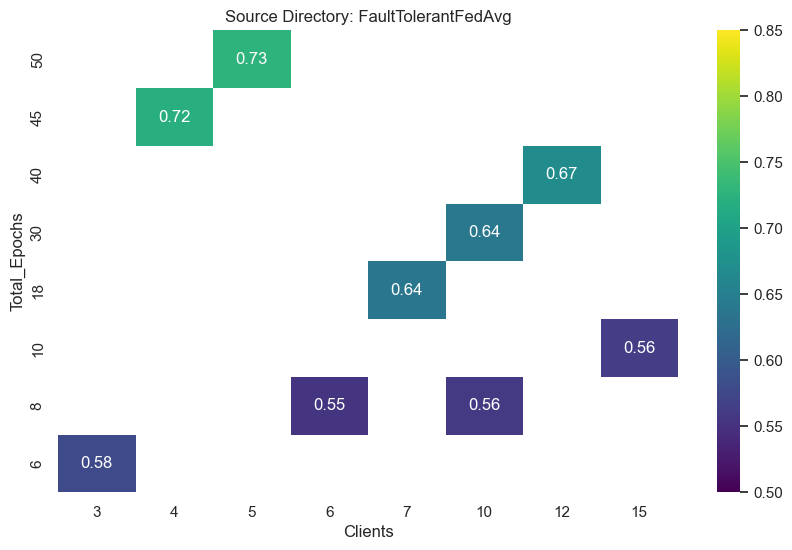

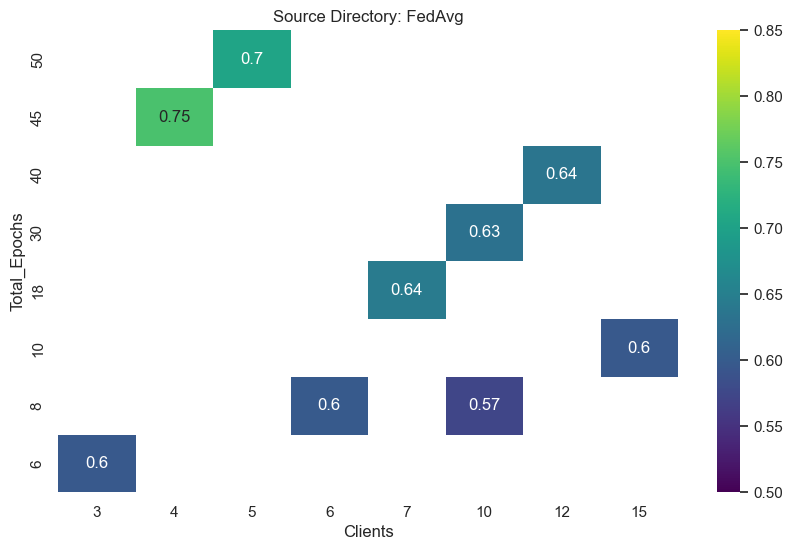

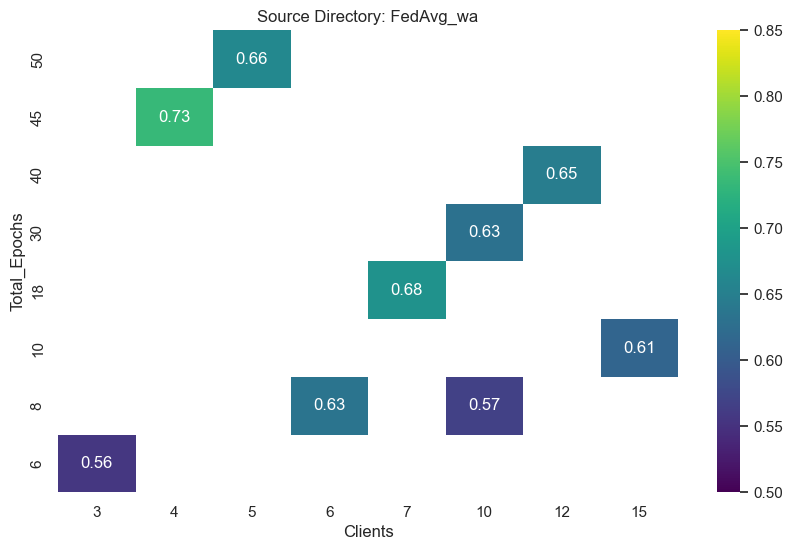

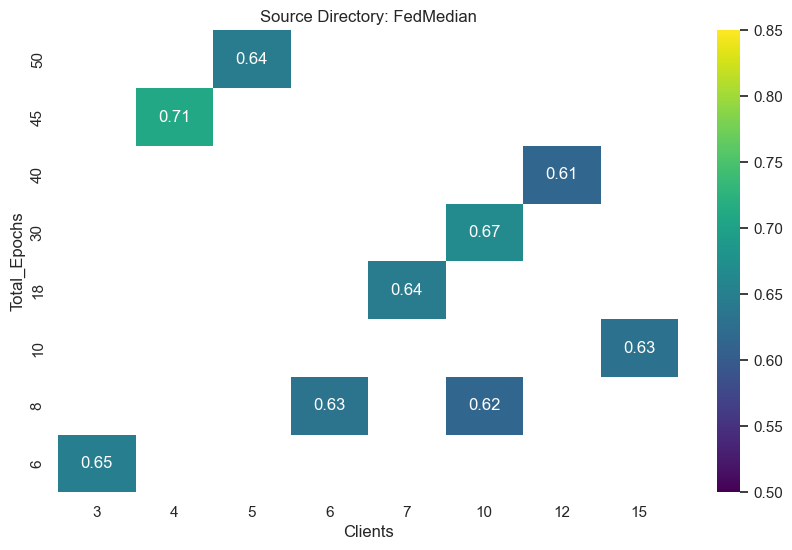

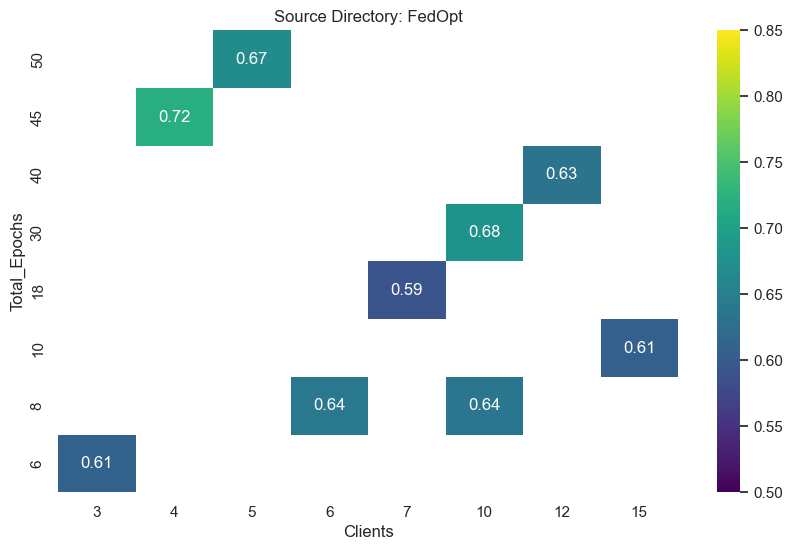

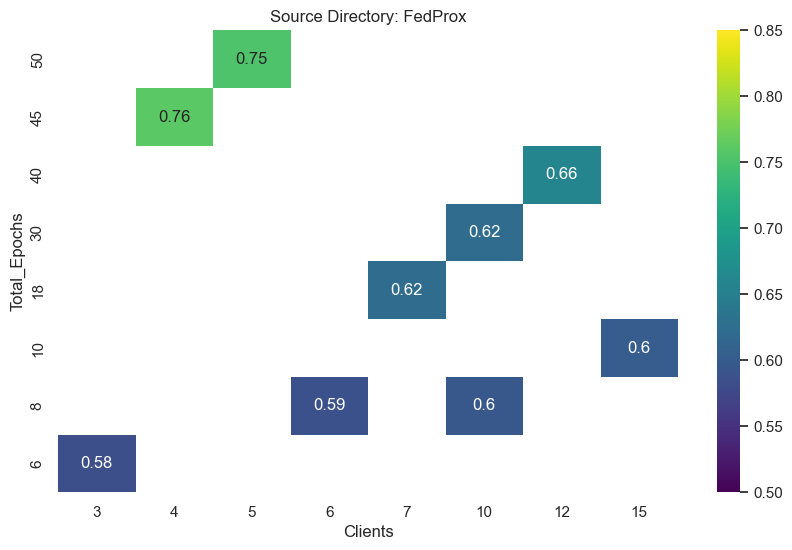

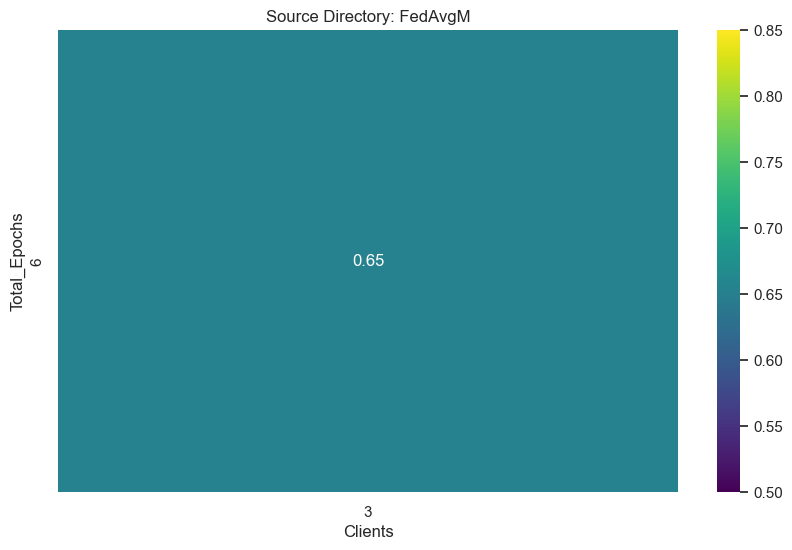

In [ ]:
# Get unique source directories
source_directories = fl['Source_Directory'].unique()

# Loop through each unique source directory
for directory in source_directories:
    # Subset the DataFrame for the current directory
    subset_df = fl[fl['Source_Directory'] == directory]
    
    # Create a pivot table for the heatmap
    pivot_table = subset_df.pivot(index='Total_Epochs', columns='Clients', values='Dice Score')
    pivot_table = pivot_table.sort_index(ascending=False)
    
    # Create a heatmap for the current directory
    plt.figure(figsize=(10,6))
    sns.heatmap(pivot_table, annot=True, cmap='viridis', vmin=0.5, vmax=0.85)
    plt.title(f'Source Directory: {directory}')
    plt


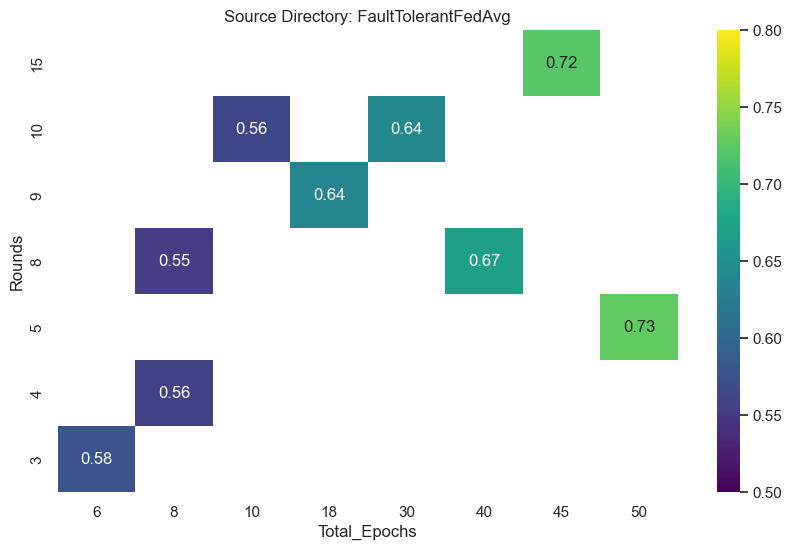

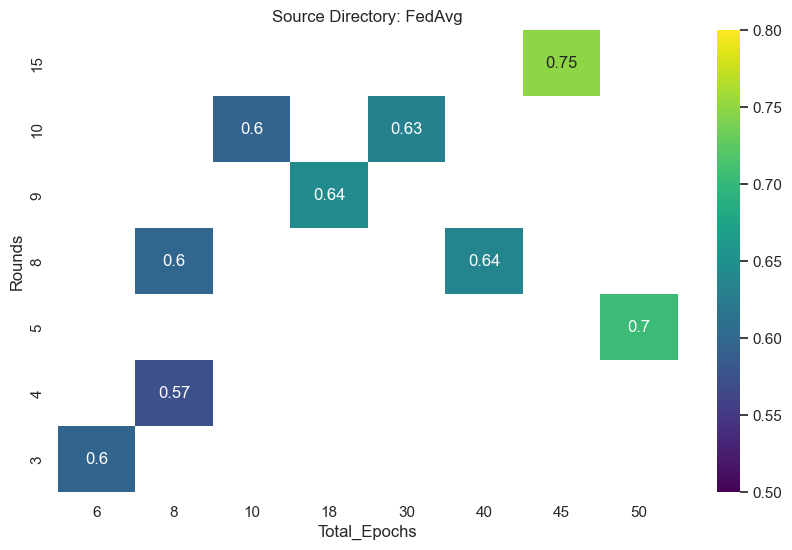

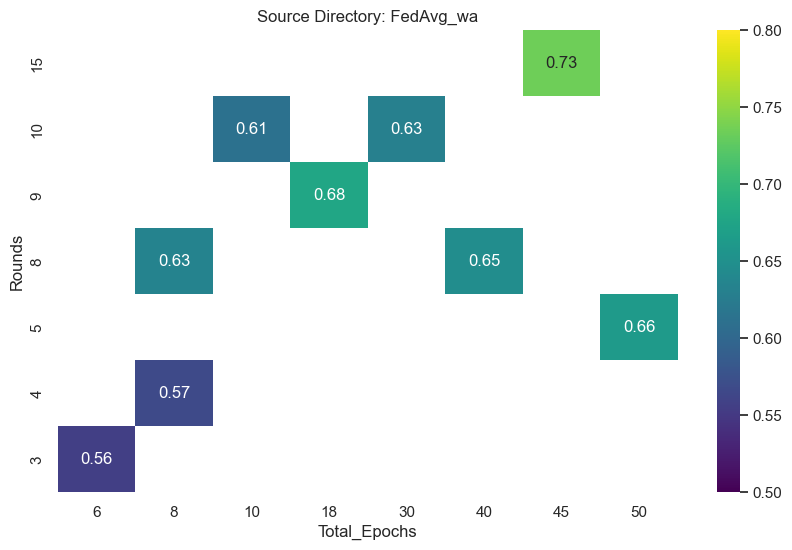

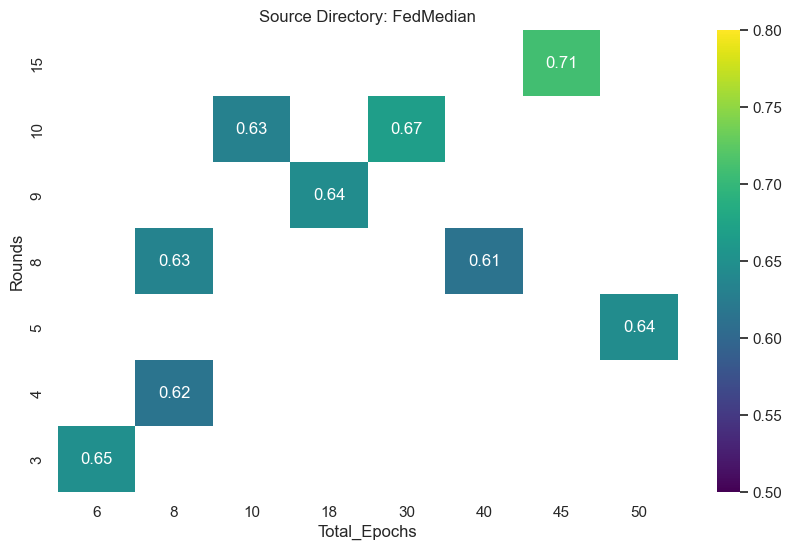

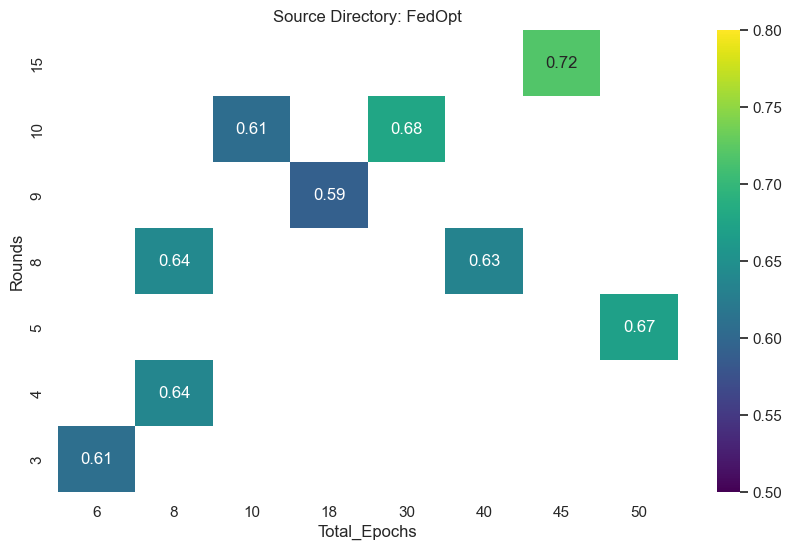

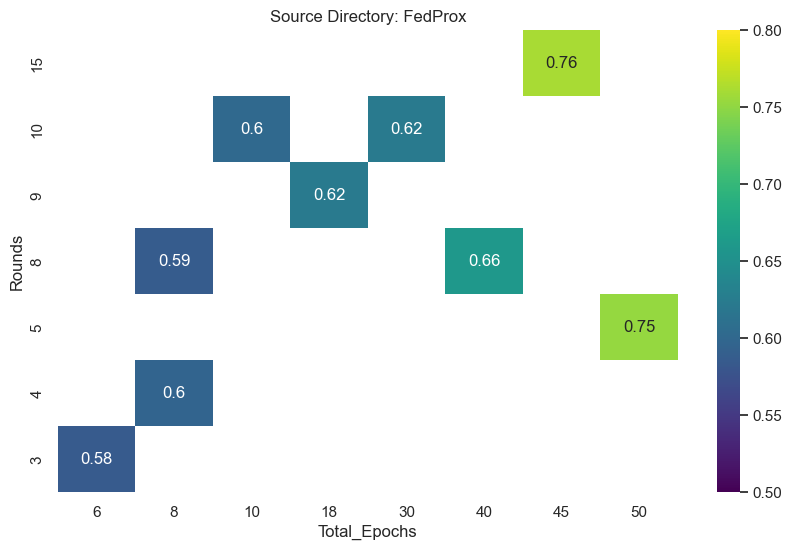

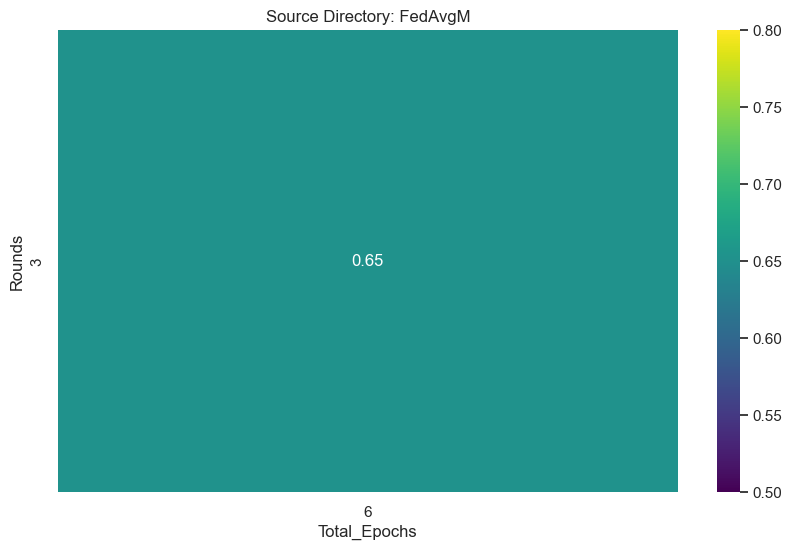

In [ ]:
# Get unique source directories
source_directories = fl['Source_Directory'].unique()

# Loop through each unique source directory
for directory in source_directories:
    # Subset the DataFrame for the current directory
    subset_df = fl[fl['Source_Directory'] == directory]
    
    # Create a pivot table for the heatmap
    pivot_table = subset_df.pivot(index='Rounds', columns='Total_Epochs', values='Dice Score')
    pivot_table = pivot_table.sort_index(ascending=False)
    
    # Create a heatmap for the current directory
    plt.figure(figsize=(10,6))
    sns.heatmap(pivot_table, annot=True, cmap='viridis', vmin=0.5, vmax=0.8)
    plt.title(f'Source Directory: {directory}')

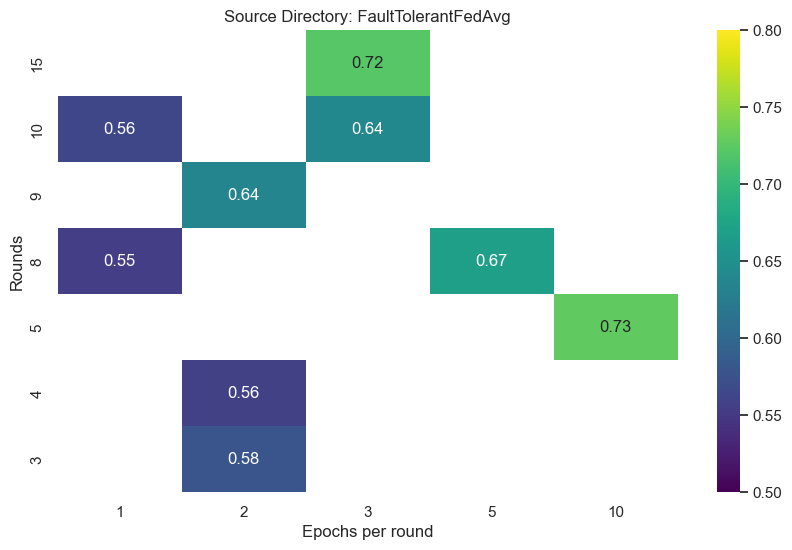

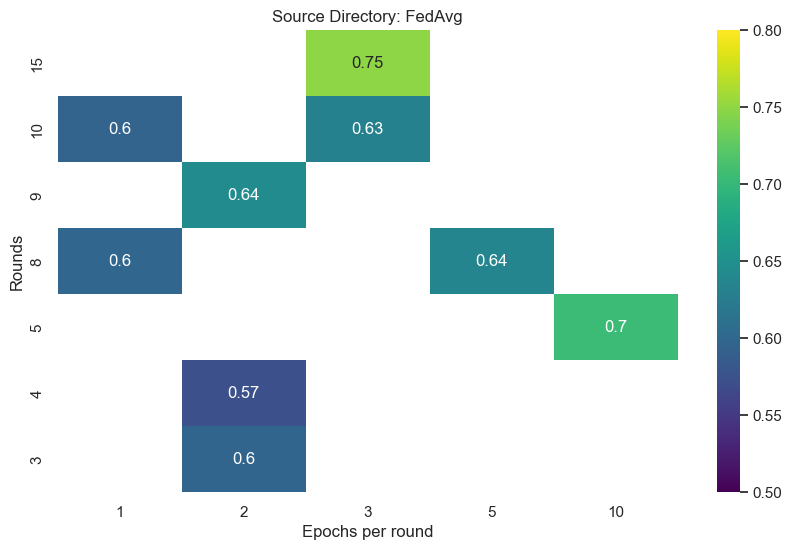

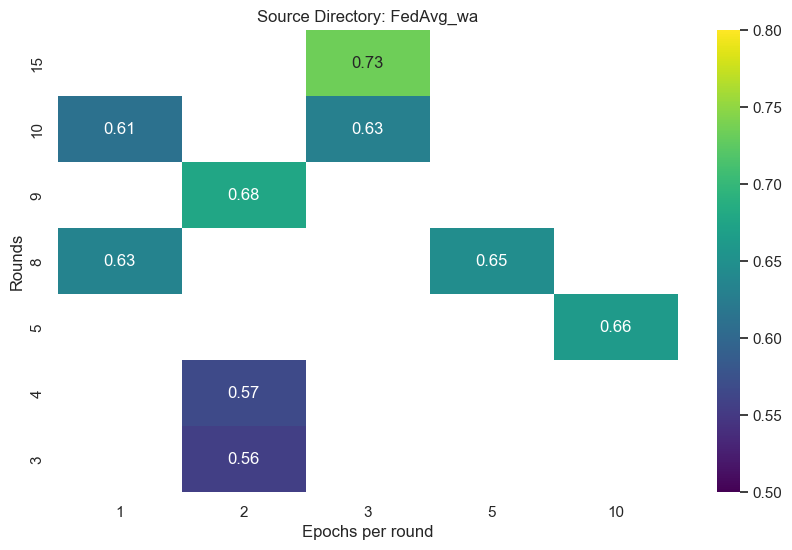

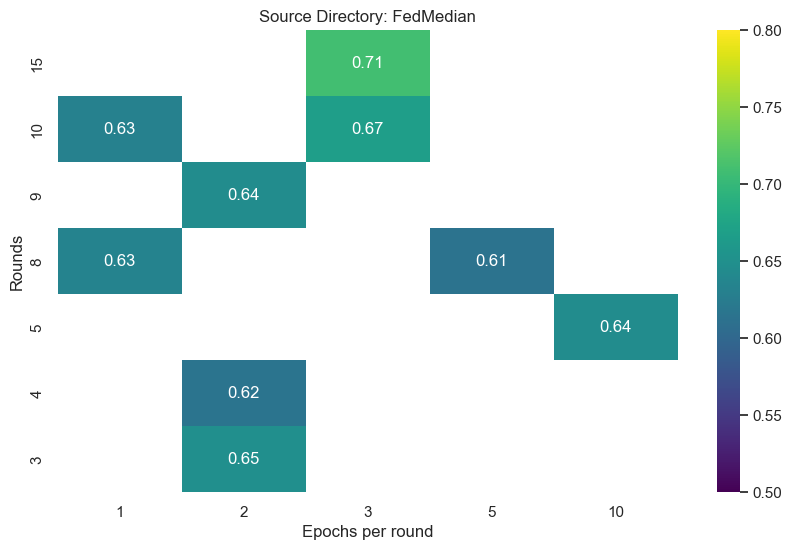

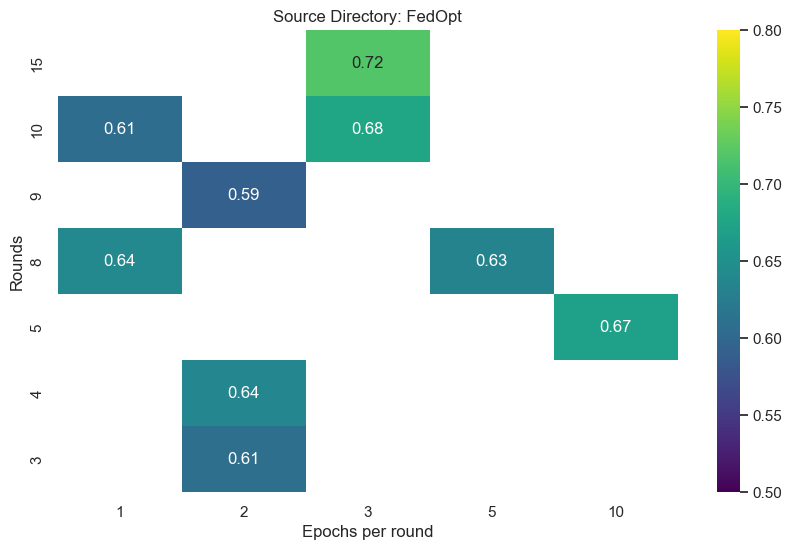

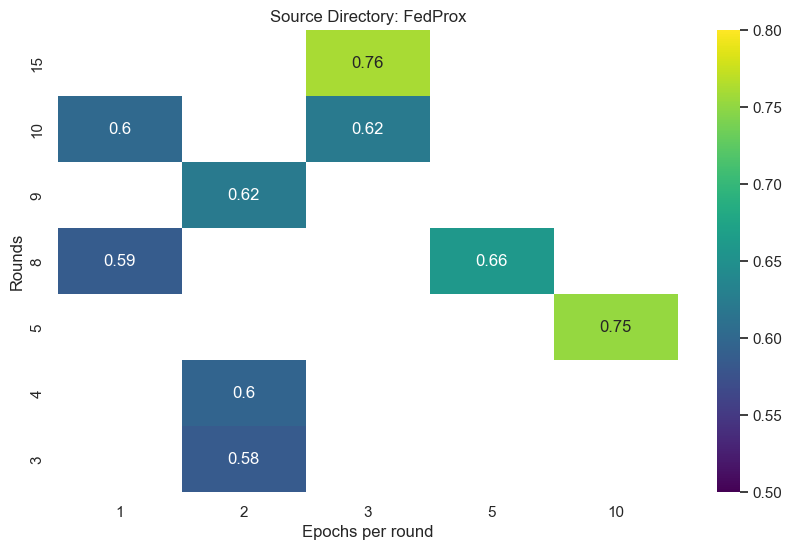

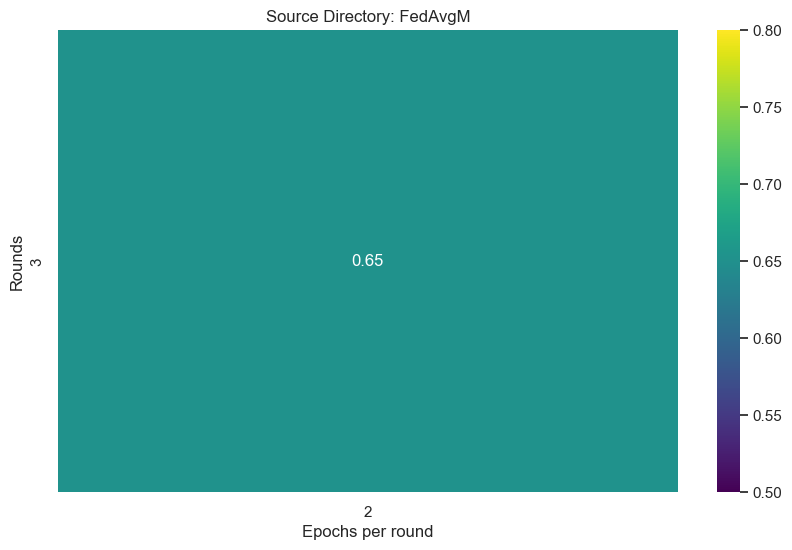

In [ ]:
# Get unique source directories
source_directories = fl['Source_Directory'].unique()

# Loop through each unique source directory
for directory in source_directories:
    # Subset the DataFrame for the current directory
    subset_df = fl[fl['Source_Directory'] == directory]
    
    # Create a pivot table for the heatmap
    pivot_table = subset_df.pivot(index='Rounds', columns='Epochs per round', values='Dice Score')
    pivot_table = pivot_table.sort_index(ascending=False)
    
    # Create a heatmap for the current directory
    plt.figure(figsize=(10,6))
    sns.heatmap(pivot_table, annot=True, cmap='viridis', vmin=0.5, vmax=0.8)
    plt.title(f'Source Directory: {directory}')

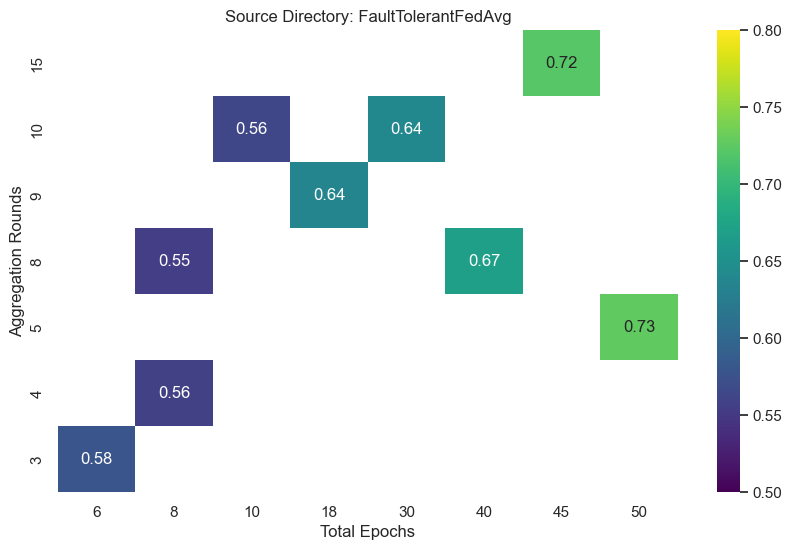

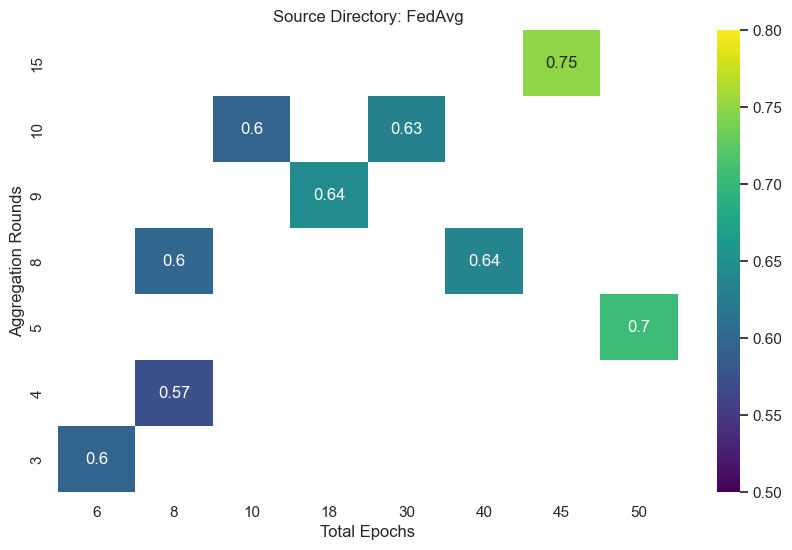

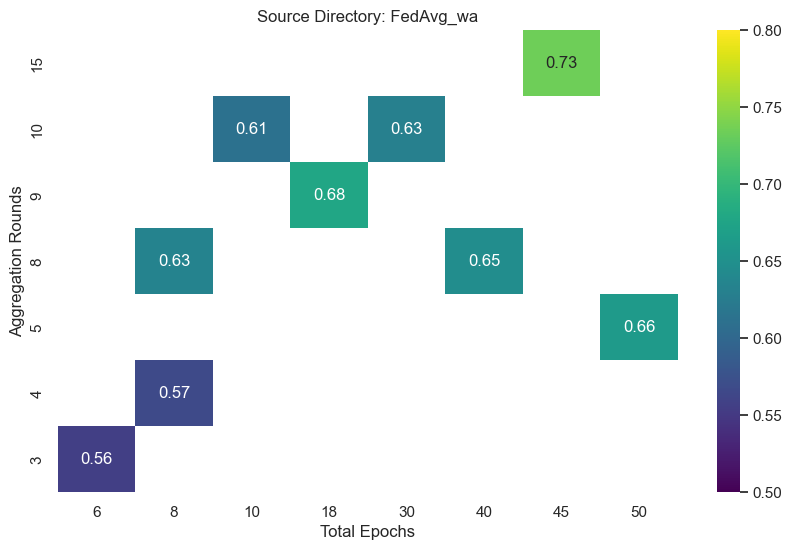

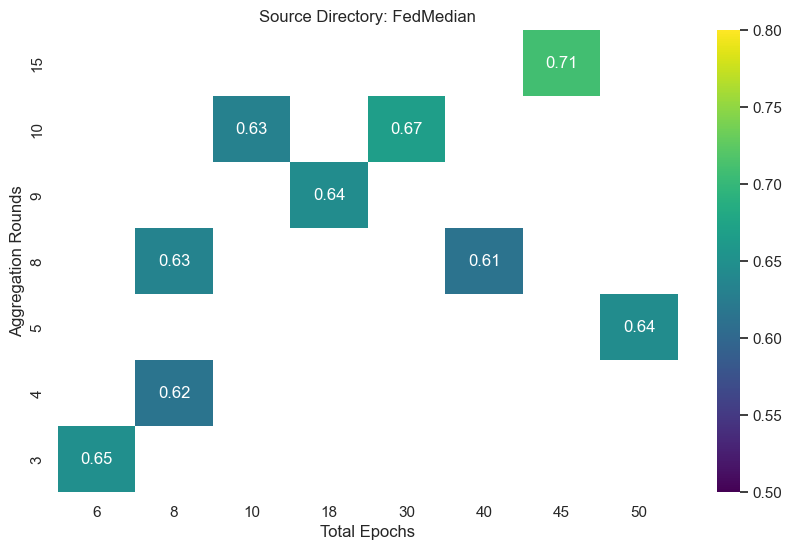

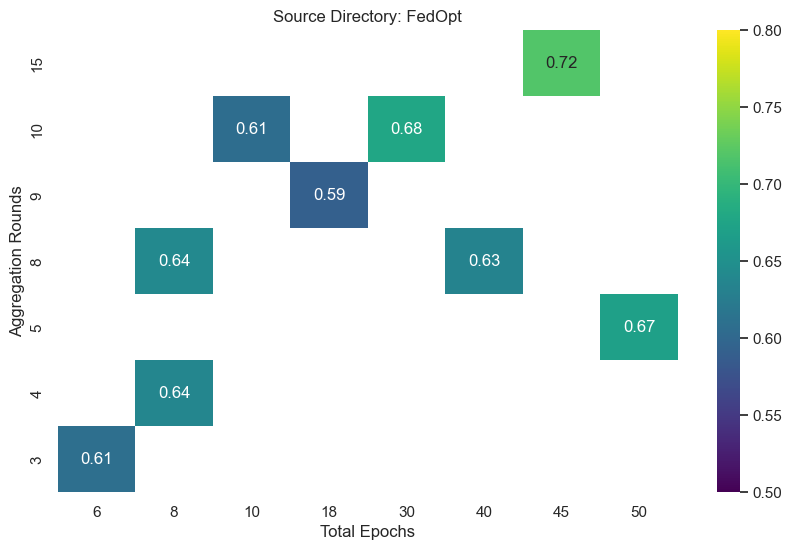

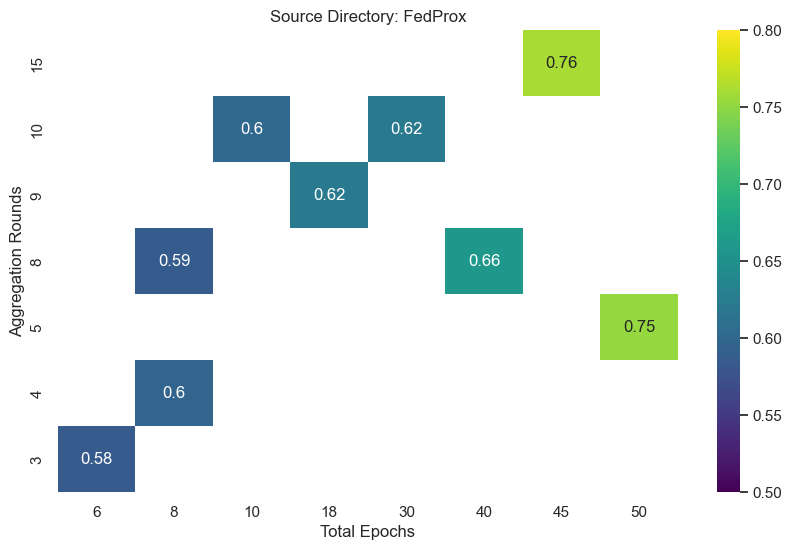

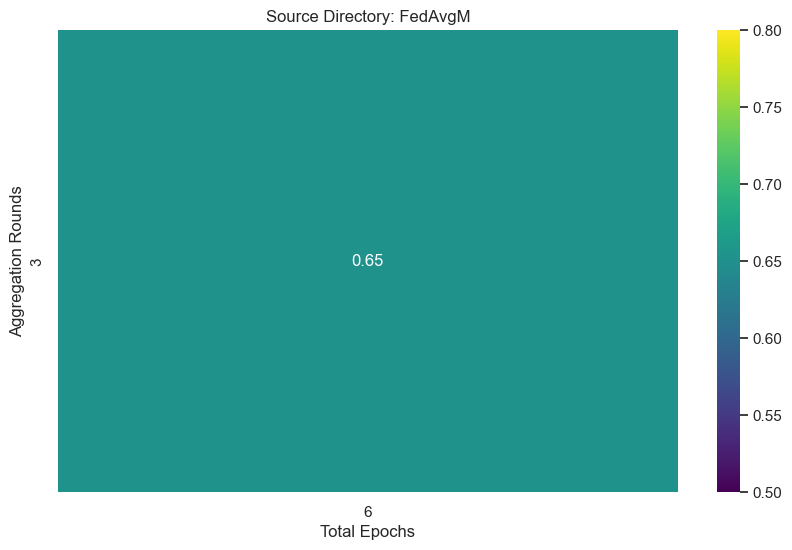

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique source directories
source_directories = fl['Source_Directory'].unique()

# Loop through each unique source directory
for directory in source_directories:
    # Subset the DataFrame for the current directory
    subset_df = fl[fl['Source_Directory'] == directory]
    
    # Create a pivot table for the heatmap
    pivot_table = subset_df.pivot(index='Rounds', columns='Total_Epochs', values='Dice Score')
    
    # Reverse the order of the 'Rounds' axis
    pivot_table = pivot_table.sort_index(ascending=False)
    
    # Create a heatmap for the current directory
    plt.figure(figsize=(10,6))
    sns.heatmap(pivot_table, annot=True, cmap='viridis', vmin=0.5, vmax=0.8)
    plt.title(f'Source Directory: {directory}')
    plt.xlabel('Total Epochs')
    plt.ylabel('Aggregation Rounds')
    plt.show()
